#Download Data

In [2]:
# download dataset
!gdown 1qobQaTzyxYtMHZVtI57p77Cogeksksi-

# download dictionary dataset
!gdown 1UoUQ1bO15SW27x3FPPBGR29EY-vJnKmE

Downloading...
From: https://drive.google.com/uc?id=1qobQaTzyxYtMHZVtI57p77Cogeksksi-
To: /content/loan_data_2007_2014.csv
100% 240M/240M [00:03<00:00, 62.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UoUQ1bO15SW27x3FPPBGR29EY-vJnKmE
To: /content/LCDataDictionary.xlsx
100% 64.8k/64.8k [00:00<00:00, 72.6MB/s]


#Import Library

In [3]:

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import math
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Read Dataset

In [11]:
df = pd.read_csv('/content/loan_data_2007_2014.csv')

<ipython-input-11-219da3c4d589>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/loan_data_2007_2014.csv')


## Data Description

In [12]:
dict = pd.read_excel("LCDataDictionary.xlsx", sheet_name="LoanStats")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
dict

Unnamed: 0  \
0                          _rec   
1                acc_now_delinq   
2                    addr_state   
3                      all_util   
4                    annual_inc   
5              annual_inc_joint   
6              application_type   
7       collection_recovery_fee   
8    collections_12_mths_ex_med   
9                   delinq_2yrs   
10                         desc   
11                    dti_joint   
12             earliest_cr_line   
13                   emp_length   
14                    emp_title   
15                         Femp   
16              fico_range_high   
17               fico_range_low   
18                  funded_amnt   
19                        grade   
20               home_ownership   
21                           id   
22                      il_util   
23          initial_list_status   
24                       inq_fi   
25                 inq_last_12m   
26               inq_last_6mths   
27                  installment   
28                     int_rate   
29                     is_inc_v   
30                      issue_d   
31                           id   
32         last_fico_range_high   
33          last_fico_range_low   
34              last_pymnt_amnt   
35                 last_pymnt_d   
36                    loan_amnt   
37                  loan_status   
38                   max_bal_bc   
39                    member_id   
40       mths_since_last_delinq   
41  mths_since_last_major_derog   
42       mths_since_last_record   
43           mths_since_rcnt_il   
44                 next_pymnt_d   
45                     open_acc   
46                  open_acc_6m   
47                  open_il_12m   
48                  open_il_24m   
49                   open_il_6m   
50                  open_rv_12m   
51                  open_rv_24m   
52                    out_prncp   
53                out_prncp_inv   
54                  policy_code   
55                      pub_rec   
56                      purpose   
57                          NaN   
58                   recoveries   
59                    revol_bal   
60                   revol_util   
61                    sub_grade   
62                         term   
63                        title   
64                 tot_coll_amt   
65                  tot_cur_bal   
66                    total_acc   
67                 total_bal_il   
68                  total_cu_tl   
69                  total_pymnt   
70              total_pymnt_inv   
71                total_rec_int   
72           total_rec_late_fee   
73              total_rec_prncp   
74           total_rev_hi_lim     
75                          url   
76        verified_status_joint   
77                     zip_code   
78                          NaN   
79                          NaN   
80                          NaN   
81                          NaN   
82                          NaN   
83                          NaN   
84                          NaN   
85                          NaN   
86                          NaN   
87                          NaN   
88                          NaN   
89                          NaN   
90                          NaN   
91                          NaN   
92                          NaN   
93                          NaN   
94                          NaN   
95                          NaN   
96                          NaN   
97              IDE701782189883   

                                                                                                                                                                                                           Description  \
0                                                                                                                                         The total amount committed by investors for that loan at that point in time.   
1                                                                                                                      

# Data Understanding

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

* There is unnecessary column that needed to be deleted
* There is missing value that needed to handle
* Several column that doesnt match the content, such as date

# Data Cleansing

## Handling Missing value

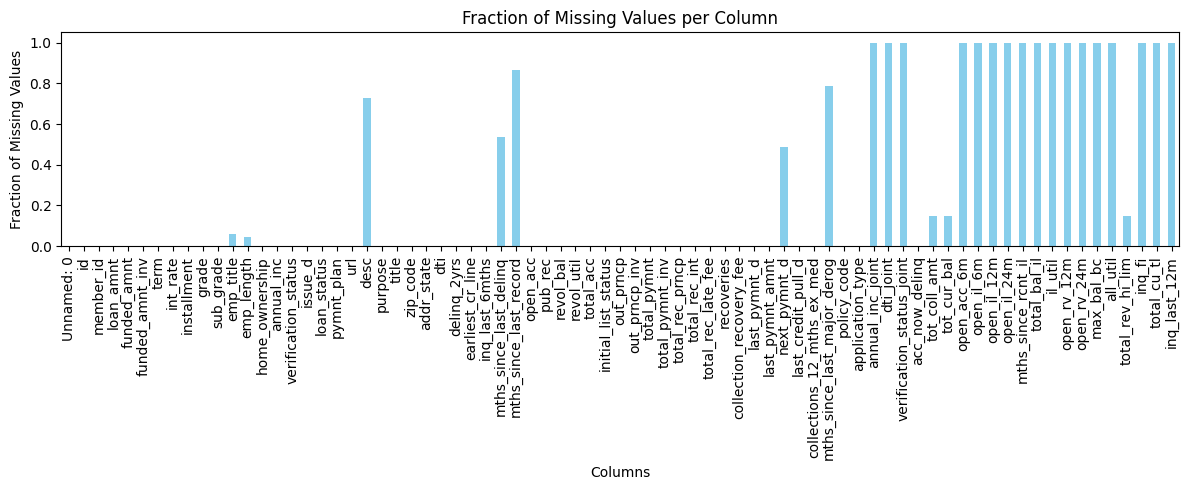

In [14]:
missing_counts = df.isnull().sum()


total_rows = len(df)
missing_fraction = missing_counts / total_rows


plt.figure(figsize=(12, 5))
missing_fraction.plot(kind='bar', color='skyblue')
plt.title('Fraction of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Fraction of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
missing_values_per_column = df.isna().sum().sort_values(ascending = False)

max_missing_values = missing_values_per_column.max()

percentage_missing_values = (missing_values_per_column / max_missing_values) * 100

print("Persentase jumlah missing value dari total keseluruhan data:")
print(percentage_missing_values)
print(percentage_missing_values.index.tolist())

Persentase jumlah missing value dari total keseluruhan data:
inq_last_12m                   100.000000
total_bal_il                   100.000000
dti_joint                      100.000000
verification_status_joint      100.000000
annual_inc_joint               100.000000
open_acc_6m                    100.000000
open_il_6m                     100.000000
open_il_12m                    100.000000
open_il_24m                    100.000000
mths_since_rcnt_il             100.000000
il_util                        100.000000
open_rv_24m                    100.000000
total_cu_tl                    100.000000
inq_fi                         100.000000
max_bal_bc                     100.000000
all_util                       100.000000
open_rv_12m                    100.000000
mths_since_last_record          86.566585
mths_since_last_major_derog     78.773926
desc                            72.981546
mths_since_last_delinq          53.690554
next_pymnt_d                    48.728567
tot_cur_bal    

Remove columns that have missing values exceeding 80%, except for the `last_pymnt_d` column, which will be retained for feature engineering purposes.

In [16]:
df1 = df.drop(columns = ['inq_last_12m', 'total_bal_il', 'dti_joint', 'verification_status_joint', 'annual_inc_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'il_util', 'open_rv_24m', 'total_cu_tl', 'inq_fi', 'max_bal_bc', 'all_util', 'open_rv_12m', 'mths_since_last_record', 'mths_since_last_major_derog', 'desc', 'mths_since_last_delinq'])

In [17]:
# For Numerical columns
# replace missing value with "Median"

for col in df1.select_dtypes(exclude = 'object'):
    df1[col] = df[col].fillna(df1[col].median())
df1.isnull().sum()

# For Categorical columns
# replace missing value with "Mode"

for col in df1.select_dtypes(include = 'object'):
    df1[col] = df1[col].fillna(df1[col].mode().iloc[0])
df1.isnull().sum()

Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

## Check duplicates

In [18]:
df1.duplicated().sum()

0

There is 0 column that has duplicate column

## Delete Unnecessary Column

Delete unnecessary column such as `0` that indicates index

In [19]:
df1 = df1.drop(columns = ['Unnamed: 0'])

Removing columns acting as identifiers due to an excess of unique values and others that might impede computational efficiency due to categorical data.

In [20]:
df1 = df1.drop(columns = ['id', 'member_id', 'url','title','addr_state','zip_code','policy_code','application_type','emp_title'])

In [21]:
df1.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
4       3000         3000           3000.0   60 months     12.69        67.79   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
4     B        B5     1 year           RENT     80000.0     Source Verified   

  issue_d  loan_status pymnt_plan         purpose    dti  delinq_2yrs  \
0  Dec-11   Fully Paid          n     credit_card  27.65          0.0   
1  Dec-11  Charged Off          n             car   1.00          0.0   
2  Dec-11   Fully Paid          n  small_business   8.72          0.0   
3  Dec-11   Fully Paid          n           other  20.00          0.0   
4  Dec-11      Current          n           other  17.94          0.0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0           Jan-85             1.0       3.0      0.0      13648        83.7   
1           Apr-99             5.0       3.0      0.0       1687         9.4   
2           Nov-01             2.0       2.0      0.0       2956        98.5   
3           Feb-96             1.0      10.0      0.0       5598        21.0   
4           Jan-96             0.0      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                0.00   
1          1008.71           456.46         435.17                0.00   
2          3003.65          2400.00         603.65                0.00   
3         12226.30         10000.00        2209.33               16.97   
4          3242.17          2233.10        1009.07                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00       Jan-15           171.62   
1      117.08                     1.11       Apr-13           119.66   
2        0.00                     0.00       Jun-14           649.91   
3        0.00                     0.00       Jan-15           357.48   
4        0.00                     0.00       Jan-16            67.79   

  next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  acc_now_delinq  \
0       Feb-16             Jan-16                         0.0             0.0   
1       Feb-16             Sep-13                         0.0             0.0   
2       Feb-16             Jan-16                         0.0             0.0   
3       Feb-16             Jan-15                         0.0             0.0   
4       Feb-16             Jan-16                         0.0             0.0   

   tot_coll_amt  tot_cur_bal  total_rev_hi_lim  
0           0.0      81539.0           22800.0  
1           0.0      81539.0           22800.0  
2           0.0      81539.0           22800.0  
3           0.0      81539.0           22800.0  
4           0.0      81539.0           22800.0

# Feature Engineering

## Change data type for date

In [22]:
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'], format = '%b-%y')
df1['last_credit_pull_d'] = pd.to_datetime(df1['last_credit_pull_d'], format = '%b-%y')
df1['last_pymnt_d'] = pd.to_datetime(df1['last_pymnt_d'], format = '%b-%y')
df1['issue_d'] = pd.to_datetime(df1['issue_d'], format = '%b-%y')
df1['next_pymnt_d'] = pd.to_datetime(df1['next_pymnt_d'], format = '%b-%y')


In [23]:
df1[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d']].head()

earliest_cr_line last_credit_pull_d last_pymnt_d    issue_d next_pymnt_d
0       1985-01-01         2016-01-01   2015-01-01 2011-12-01   2016-02-01
1       1999-04-01         2013-09-01   2013-04-01 2011-12-01   2016-02-01
2       2001-11-01         2016-01-01   2014-06-01 2011-12-01   2016-02-01
3       1996-02-01         2015-01-01   2015-01-01 2011-12-01   2016-02-01
4       1996-01-01         2016-01-01   2016-01-01 2011-12-01   2016-02-01

## Add New Features

Adding New Features :

1.  Column `pymnt_time` = the number of month between `next_pymnt_d` and `last_pymnt_d`

2. Column `credit_duration_year` = the number of year between `earliest_cr_line` and `last_credit_pull_d`

In [24]:
def diff_month(a, b):
    return (a.year - b.year) * 12 + a.month - b.month
def diff_year(a, b):
    return (a.year - b.year)

df1['pymnt_time'] = df1.apply(lambda x: diff_month(x.next_pymnt_d, x.last_pymnt_d), axis=1)
df1['credit_duration_year'] = df1.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)


In [25]:
df1.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
4       3000         3000           3000.0   60 months     12.69        67.79   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
4     B        B5     1 year           RENT     80000.0     Source Verified   

     issue_d  loan_status pymnt_plan         purpose    dti  delinq_2yrs  \
0 2011-12-01   Fully Paid          n     credit_card  27.65          0.0   
1 2011-12-01  Charged Off          n             car   1.00          0.0   
2 2011-12-01   Fully Paid          n  small_business   8.72          0.0   
3 2011-12-01   Fully Paid          n           other  20.00          0.0   
4 2011-12-01      Current          n           other  17.94          0.0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1985-01-01             1.0       3.0      0.0      13648        83.7   
1       1999-04-01             5.0       3.0      0.0       1687         9.4   
2       2001-11-01             2.0       2.0      0.0       2956        98.5   
3       1996-02-01             1.0      10.0      0.0       5598        21.0   
4       1996-01-01             0.0      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                0.00   
1          1008.71           456.46         435.17                0.00   
2          3003.65          2400.00         603.65                0.00   
3         12226.30         10000.00        2209.33               16.97   
4          3242.17          2233.10        1009.07                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00   2015-01-01           171.62   
1      117.08                     1.11   2013-04-01           119.66   
2        0.00                     0.00   2014-06-01           649.91   
3        0.00                     0.00   2015-01-01           357.48   
4        0.00                     0.00   2016-01-01            67.79   

  next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  acc_now_delinq  \
0   2016-02-01         2016-01-01                         0.0             0.0   
1   2016-02-01         2013-09-01                         0.0             0.0   
2   2016-02-01         2016-01-01                         0.0             0.0   
3   2016-02-01         2015-01-01                         0.0             0.0   
4   2016-02-01         2016-01-01                         0.0             0.0   

   tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  \
0           0.0      81539.0           22800.0          13   
1           0.0      81539.0           22800.0          34   
2           0.0      81539.0           22800.0          20   
3           0.0      81539.0     

In [26]:
df1[df1['pymnt_time']<0][['next_pymnt_d','last_pymnt_d','pymnt_time']]

next_pymnt_d last_pymnt_d  pymnt_time
40122   2011-02-01   2016-01-01         -59
40481   2010-10-01   2016-01-01         -63
40498   2010-10-01   2016-01-01         -63
40753   2010-06-01   2016-01-01         -67
40769   2010-06-01   2016-01-01         -67
40785   2010-06-01   2016-01-01         -67
40848   2010-05-01   2016-01-01         -68
40914   2010-04-01   2016-01-01         -69
40927   2010-04-01   2016-01-01         -69
41145   2009-11-01   2016-01-01         -74
41887   2008-12-01   2016-01-01         -85
41931   2009-01-01   2016-01-01         -84

In [27]:
df1[df1['credit_duration_year']<0][['earliest_cr_line','last_credit_pull_d','credit_duration_year']]

earliest_cr_line last_credit_pull_d  credit_duration_year
1580         2062-09-01         2013-09-01                   -49
1770         2068-09-01         2015-09-01                   -53
2799         2064-09-01         2016-01-01                   -48
3282         2067-09-01         2015-05-01                   -52
3359         2065-02-01         2014-11-01                   -51
3413         2067-06-01         2013-04-01                   -54
3607         2067-08-01         2014-04-01                   -53
3989         2063-12-01         2014-11-01                   -49
4440         2068-09-01         2016-01-01                   -52
4449         2068-09-01         2015-10-01                   -53
4492         2063-03-01         2014-07-01                   -49
5109         2068-08-01         2013-02-01                   -55
5417         2065-11-01         2014-11-01                   -51
5692         2065-05-01         2013-07-01                   -52
6137         2054-10-01         2014-10-01                   -40
6435         2068-06-01         2015-12-01                   -53
7445         2065-10-01         2015-09-01                   -50
7481         2066-04-01         2016-01-01                   -50
7583         2068-09-01         2015-11-01                   -53
7667         2068-03-01         2016-01-01                   -52
7893         2062-09-01         2015-02-01                   -47
8310         2065-09-01         2012-11-01                   -53
8484         2067-04-01         2014-02-01                   -53
8806         2063-10-01         2014-06-01                   -49
8908         2067-04-01         2013-09-01                   -54
9164         2063-10-01         2014-07-01                   -49
10344        2064-10-01         2016-01-01                   -48
10907        2063-05-01         2016-01-01                   -47
11288        2067-07-01         2016-01-01                   -51
11336        2062-09-01         2014-09-01                   -48
12059        2066-11-01         2016-01-01                   -50
12200        2068-03-01         2014-10-01                   -54
12907        2065-05-01         2016-01-01                   -49
13048        2068-02-01         2014-10-01                   -54
13128        2064-07-01         2016-01-01                   -48
13226        2067-11-01         2016-01-01                   -51
13489        2064-04-01         2014-06-01                   -50
13997        2059-06-01         2014-06-01                   -45
14015        2056-09-01         2016-01-01                   -40
14074        2066-06-01         2014-06-01                   -52
14118        2046-01-01         2014-09-01                   -32
14244        2066-03-01         2015-03-01                   -51
14276        2063-01-01         2014-07-01                   -49
15315        2050-12-01         2011-06-01                   -39
15439        2066-03-01         2016-01-01                   -50
15527        2068-01-01         2011-08-01                   -57
16991        2068-02-01         2014-04-01                   -54
17618        2066-02-01         2015-10-01                   -51
18818        2064-09-01         2012-07-01                   -52
18846        2065-10-01         2014-03-01                   -51
19303        2064-09-01         2012-05-01                   -52
19434        2066-11-01         2016-01-01                   -50
19709        2061-12-01         2016-01-01                   -45
19902        2067-04-01         2016-01-01                   -51
20774        2068-08-01         2013-05-01                   -55
21050        2066-11-01         2013-09-01                   -53
21124        2068-08-01         2013-02-01                   -55
21151        2068-12-01         2014-01-01                   -54
22098        2054-11-01         2014-01-01                   -40
23169        2064-04-01         2013-12-01                   -51
24314        2068-08-01         2015-11-01


* Assuming the customer doesn't have a bill to make a payment, the negative value in column `pymnt_time` will be subtituted with 0 and the cause of negative value is assumed due false input
* There is some data that make no sense in feature `earliest_cr_line` and assumed because of false input, therefore resulting negative value in `credit_duration_year`

In [28]:
df1.loc[df1['pymnt_time'] < 0,'pymnt_time'] = 0
df1.loc[df1['credit_duration_year'] < 0,'credit_duration_year'] = df1['credit_duration_year'].max()


Remove date type columns that have been extracted and any others that have no utility.

In [29]:
df1.drop(columns=['earliest_cr_line', 'issue_d','next_pymnt_d','last_pymnt_d','last_credit_pull_d'], inplace = True)


## Change feature `term`

In [30]:
df1.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
4       3000         3000           3000.0   60 months     12.69        67.79   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
4     B        B5     1 year           RENT     80000.0     Source Verified   

   loan_status pymnt_plan         purpose    dti  delinq_2yrs  inq_last_6mths  \
0   Fully Paid          n     credit_card  27.65          0.0             1.0   
1  Charged Off          n             car   1.00          0.0             5.0   
2   Fully Paid          n  small_business   8.72          0.0             2.0   
3   Fully Paid          n           other  20.00          0.0             1.0   
4      Current          n           other  17.94          0.0             0.0   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0       3.0      0.0      13648        83.7        9.0                   f   
1       3.0      0.0       1687         9.4        4.0                   f   
2       2.0      0.0       2956        98.5       10.0                   f   
3      10.0      0.0       5598        21.0       37.0                   f   
4      15.0      0.0      27783        53.9       38.0                   f   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0   5861.071414          5831.78          5000.00   
1        0.0            0.0   1008.710000          1008.71           456.46   
2        0.0            0.0   3003.653644          3003.65          2400.00   
3        0.0            0.0  12226.302210         12226.30         10000.00   
4      766.9          766.9   3242.170000          3242.17          2233.10   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         603.65                0.00        0.00                     0.00   
3        2209.33               16.97        0.00                     0.00   
4        1009.07                0.00        0.00                     0.00   

   last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  \
0           171.62                         0.0             0.0           0.0   
1           119.66                         0.0             0.0           0.0   
2           649.91                         0.0             0.0           0.0   
3           357.48                         0.0             0.0           0.0   
4            67.79                         0.0             0.0           0.0   

   tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_duration_year  
0      81539.0           22800.0          13                    31  
1      81539.0           22800.0          34                    14  
2      81539.0           22800.0          20                    15  
3      81539.0           22800.0          13                    19  
4      81539.0           22800.0           1                    20

In [31]:
df1['term'].value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

There is two unique values in feature `term`.

In further analysis, the `term` column consisting of '36 months' and '60 months' will be transformed into '36' and '60' only.

In [32]:
df1['term'] = df['term'].apply(lambda term: int(term[0:3]))

In [33]:
df1['term'].value_counts()

36    337953
60    128332
Name: term, dtype: int64

## Check Target Value (`loan_status`)

In [34]:
df1['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

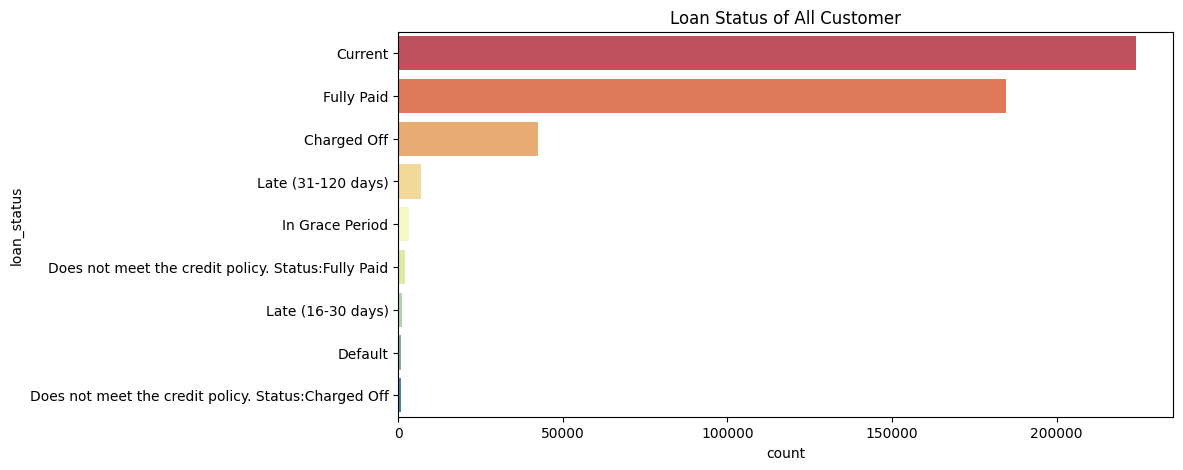

Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: loan_status, dtype: object


In [35]:
value_counts = df1["loan_status"].value_counts().sort_values(ascending=False)

percentage = value_counts / value_counts.sum()
percentage = percentage.apply(lambda x: "{:.2%}".format(x))

sorted_df = df.loc[df['loan_status'].isin(value_counts.index)]

plt.figure(figsize=(10, 5))
plt.title('Loan Status of All Customer')
sns.countplot(y="loan_status", data=sorted_df, palette='Spectral', order=value_counts.index)
plt.show()

print(percentage)


* Between 9 unique value in `loan_status`, `Current`, `Fully Paid`, and `In Grace Period` are defined as good loan.
* Meanwhile, bad loans will be defined as other than the mentioned good loans.
* For the model, the feature will be devided into two group namely 'good loan' that will be represents 1, and 'bad loan' with 0

In [36]:
good = ['Current', 'Fully Paid', 'In Grace Period']
df1['loan_status'] = np.where(df1['loan_status'].isin(good), 1, 0)

df1['loan_status'].value_counts()

1    412111
0     54174
Name: loan_status, dtype: int64

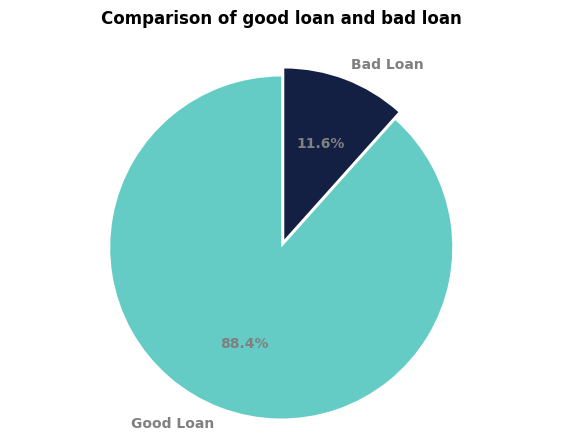

In [37]:
churn_rate = df1['loan_status'].value_counts()
explode = (0.05, 0)
text_props = {'color': 'gray', 'weight': 'bold'}

plt.figure(figsize=(7, 5))
plt.pie(churn_rate, labels=['Good Loan', 'Bad Loan'], autopct='%1.1f%%', startangle=90, explode = explode, colors = [ '#64CCC5', '#132043'], textprops=text_props)
plt.axis('equal')
plt.title('Comparison of good loan and bad loan', fontweight='bold', pad=20)
plt.show()

# Exploratory Data Analysis

In [38]:
df1.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
4       3000         3000           3000.0    60     12.69        67.79     B   

  sub_grade emp_length home_ownership  annual_inc verification_status  \
0        B2  10+ years           RENT     24000.0            Verified   
1        C4   < 1 year           RENT     30000.0     Source Verified   
2        C5  10+ years           RENT     12252.0        Not Verified   
3        C1  10+ years           RENT     49200.0     Source Verified   
4        B5     1 year           RENT     80000.0     Source Verified   

   loan_status pymnt_plan         purpose    dti  delinq_2yrs  inq_last_6mths  \
0            1          n     credit_card  27.65          0.0             1.0   
1            0          n             car   1.00          0.0             5.0   
2            1          n  small_business   8.72          0.0             2.0   
3            1          n           other  20.00          0.0             1.0   
4            1          n           other  17.94          0.0             0.0   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0       3.0      0.0      13648        83.7        9.0                   f   
1       3.0      0.0       1687         9.4        4.0                   f   
2       2.0      0.0       2956        98.5       10.0                   f   
3      10.0      0.0       5598        21.0       37.0                   f   
4      15.0      0.0      27783        53.9       38.0                   f   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0   5861.071414          5831.78          5000.00   
1        0.0            0.0   1008.710000          1008.71           456.46   
2        0.0            0.0   3003.653644          3003.65          2400.00   
3        0.0            0.0  12226.302210         12226.30         10000.00   
4      766.9          766.9   3242.170000          3242.17          2233.10   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         603.65                0.00        0.00                     0.00   
3        2209.33               16.97        0.00                     0.00   
4        1009.07                0.00        0.00                     0.00   

   last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  \
0           171.62                         0.0             0.0           0.0   
1           119.66                         0.0             0.0           0.0   
2           649.91                         0.0             0.0           0.0   
3           357.48                         0.0             0.0           0.0   
4            67.79                         0.0             0.0           0.0   

   tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_duration_year  
0      81539.0           22800.0          13                    31  
1      81539.0           22800.0          34                    14  
2      81539.0           22800.0          20                    15  
3      81539.0           22800.0          13                    19  
4      81539.0           22800.0           1                    20

In [39]:
df1.tail()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
466280      18400        18400          18400.0    60     14.47       432.64   
466281      22000        22000          22000.0    60     19.97       582.50   
466282      20700        20700          20700.0    60     16.99       514.34   
466283       2000         2000           2000.0    36      7.90        62.59   
466284      10000        10000           9975.0    36     19.20       367.58   

       grade sub_grade emp_length home_ownership  annual_inc  \
466280     C        C2    4 years       MORTGAGE    110000.0   
466281     D        D5  10+ years       MORTGAGE     78000.0   
466282     D        D1    7 years       MORTGAGE     46000.0   
466283     A        A4    3 years            OWN     83000.0   
466284     D        D3  10+ years       MORTGAGE     46000.0   

       verification_status  loan_status pymnt_plan             purpose    dti  \
466280     Source Verified            1          n  debt_consolidation  19.85   
466281            Verified            0          n  debt_consolidation  18.45   
466282            Verified            1          n  debt_consolidation  25.65   
466283            Verified            1          n         credit_card   5.39   
466284            Verified            1          n               other  22.78   

        delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
466280          0.0             2.0      18.0      0.0      23208        77.6   
466281          0.0             5.0      18.0      1.0      18238        46.3   
466282          0.0             2.0      18.0      0.0       6688        51.1   
466283          3.0             1.0      21.0      0.0      11404        21.5   
466284          1.0             0.0       6.0      0.0      11325        70.8   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
466280       36.0                   w   12574.00       12574.00  10383.360000   
466281       30.0                   f       0.00           0.00   4677.920000   
466282       43.0                   f   14428.31       14428.31  12343.980000   
466283       27.0                   w       0.00           0.00   2126.579838   
466284       22.0                   f    3984.38        3974.41   8821.620000   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
466280         10383.36          5826.00        4557.36                 0.0   
466281          4677.92          1837.04        2840.88                 0.0   
466282         12343.98          6271.69        6072.29                 0.0   
466283          2126.58          2000.00         126.58                 0.0   
466284          8799.57          6015.62        2806.00                 0.0   

        recoveries  collection_recovery_fee  last_pymnt_amnt  \
466280         0.0                      0.0           432.64   
466281         0.0                      0.0            17.50   
466282         0.0                      0.0           514.34   
466283         0.0                      0.0          1500.68   
466284         0.0                      0.0           367.58   

        collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
466280                         0.0             0.0           0.0     294998.0   
466281                         0.0             0.0           0.0     221830.0   
466282                         0.0             0.0           0.0      73598.0   
466283                         0.0             0.0           0.0     591610.0   
466284                         0.0             0.0           0.0      57477.0   

        total_rev_hi_lim  pymnt_time  credit_duration_year  
466280           29900.0           1                    13  
466281           39400.0          14                    19  
466282           13100.0           1                    14  
466283           53100.0          14                    12  
466284           16000.0     

## Correlation

### Between Numerical

In [40]:
nums = df1.select_dtypes(include = np.number).columns.tolist()
print(nums)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'pymnt_time', 'credit_duration_year']


<Axes: >

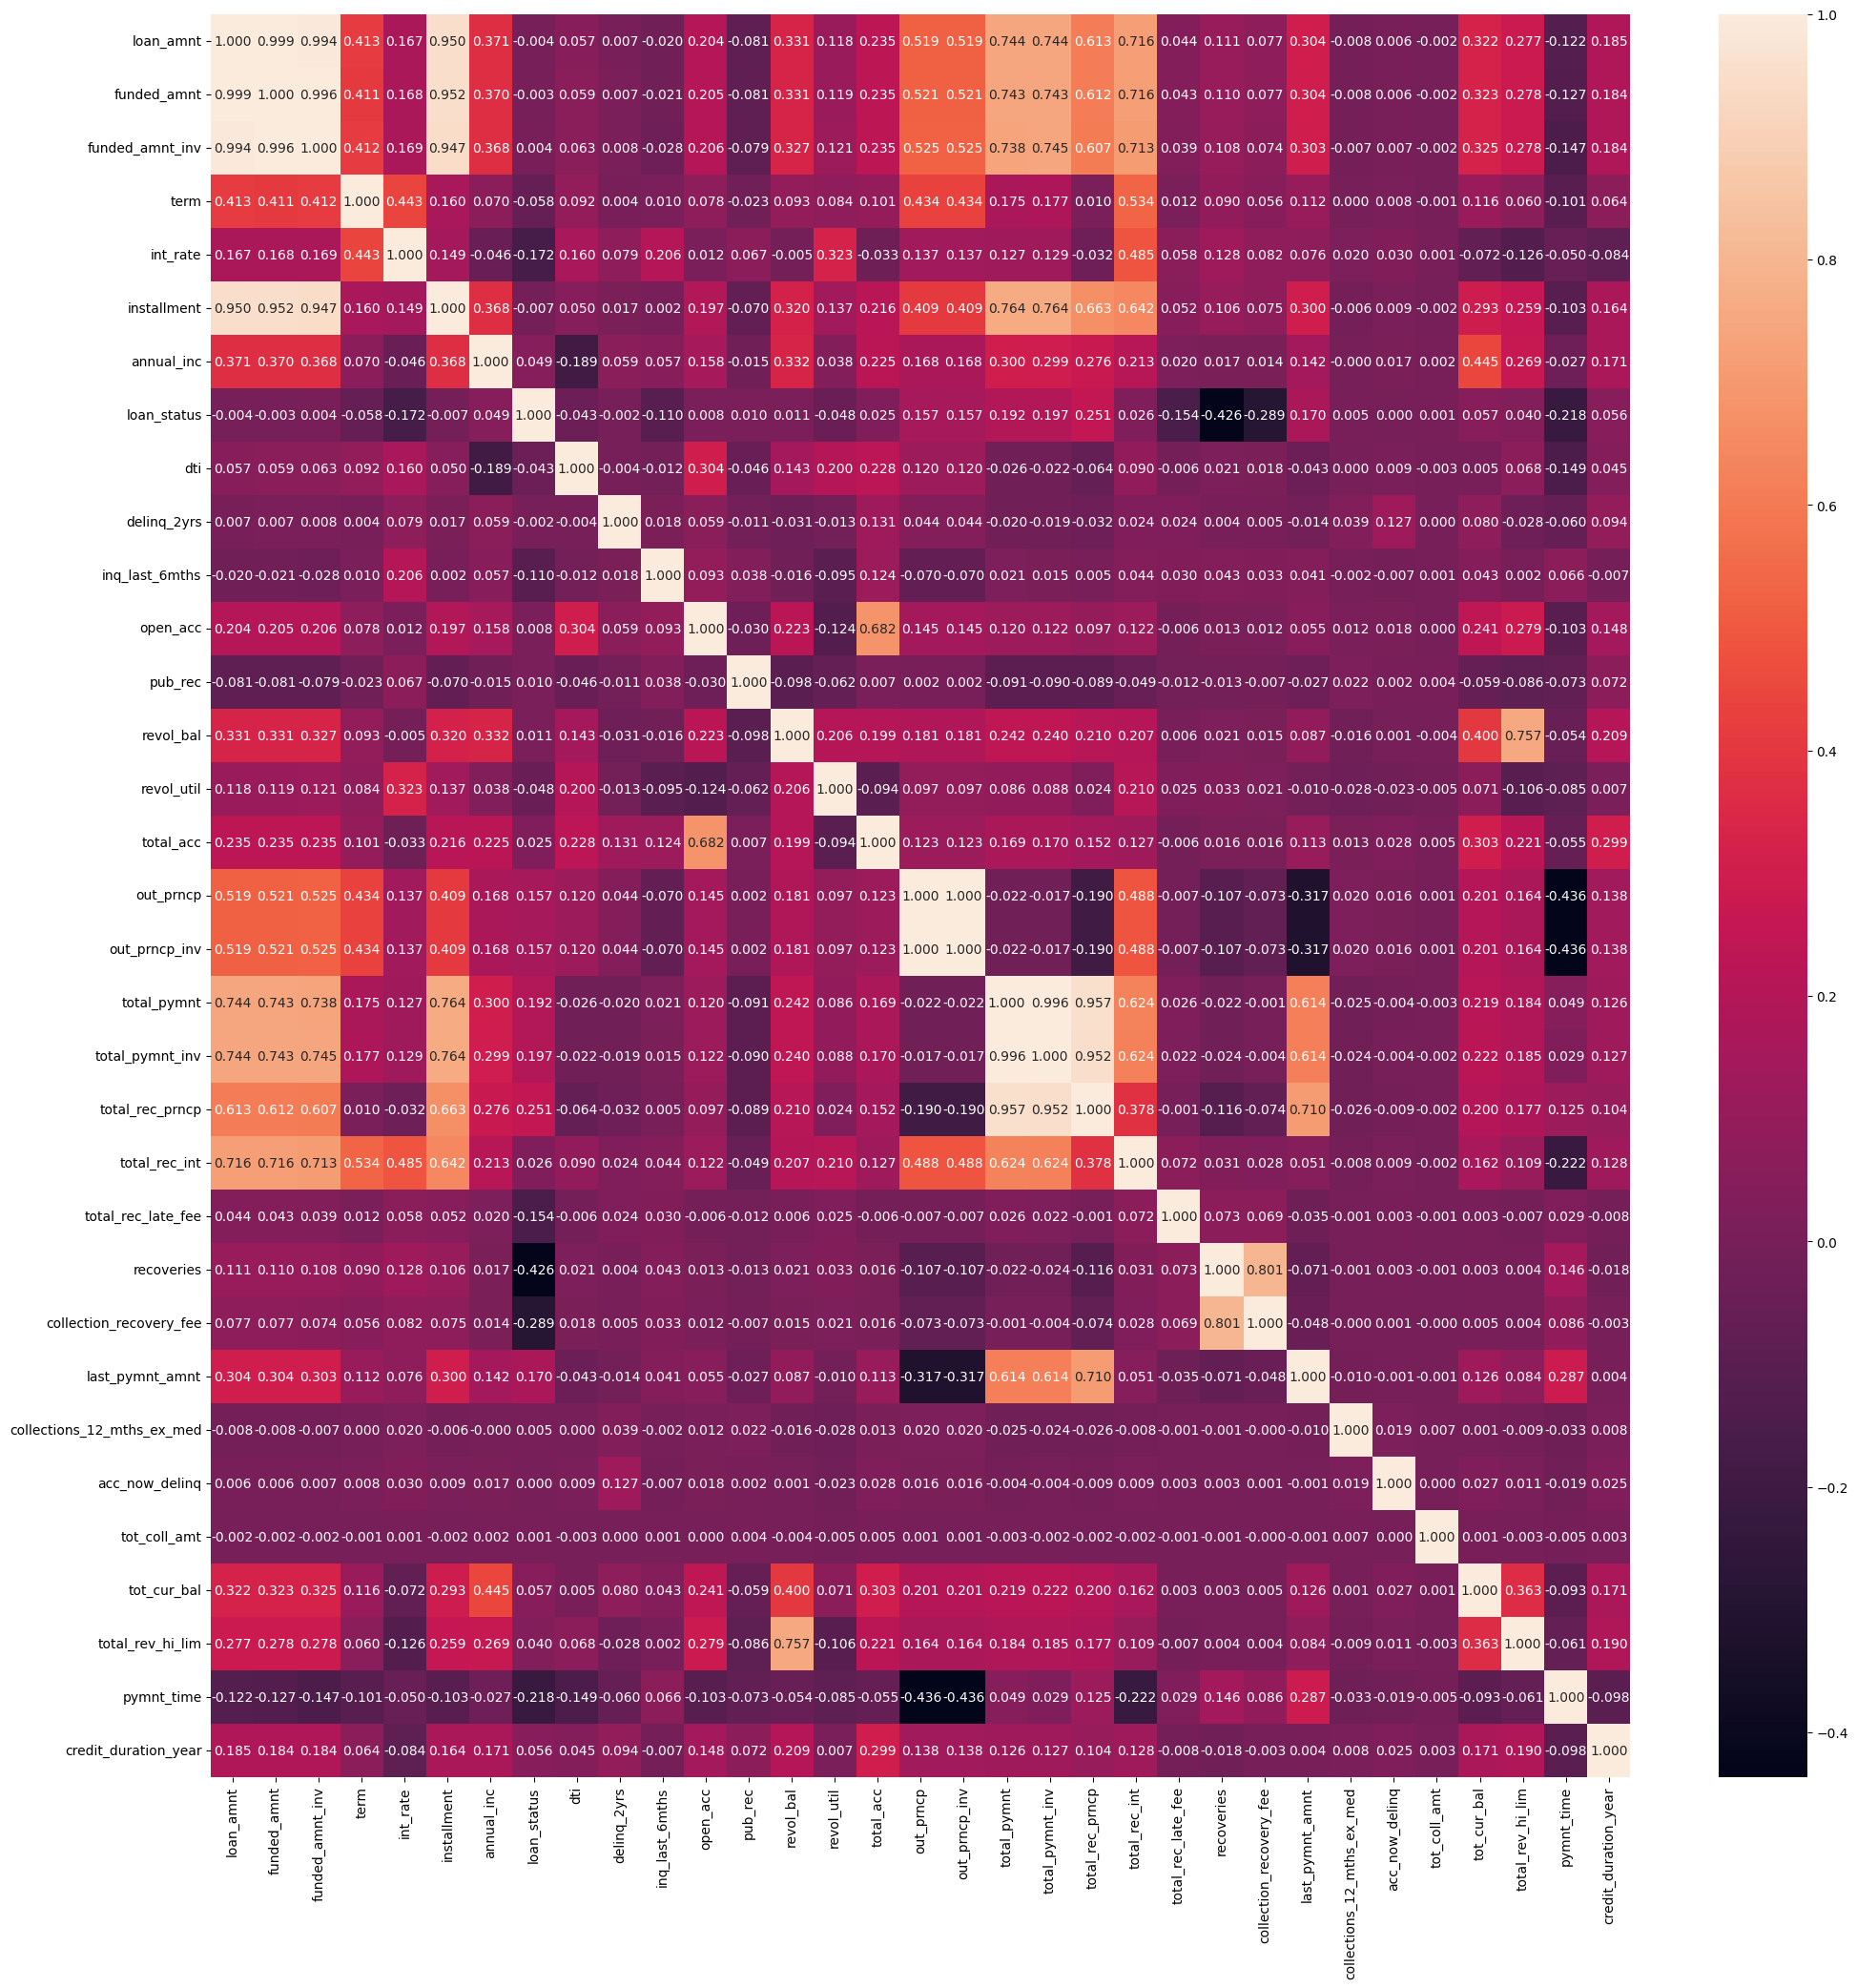

In [41]:
# between numerical
plt.figure(figsize=(24,24))
df1_num = df1[nums]
sns.heatmap(df1_num.corr(),annot=True,fmt='.3f')

Observation :
* Several features are founds to be highly correlated with each other that may caused the model to be unstable.
* Further action is to remove features  that have correlation more than 0.8

In [42]:
corr_matrix = df1_num.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_multicor = [column for column in upper.columns if any(upper[column] > 0.8)]


<ipython-input-42-0bf7418b00e4>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [43]:
print(high_multicor)

['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'collection_recovery_fee']


In [44]:
df1 = df1.drop(columns = high_multicor)

In [45]:
df1.head()

loan_amnt  term  int_rate grade sub_grade emp_length home_ownership  \
0       5000    36     10.65     B        B2  10+ years           RENT   
1       2500    60     15.27     C        C4   < 1 year           RENT   
2       2400    36     15.96     C        C5  10+ years           RENT   
3      10000    36     13.49     C        C1  10+ years           RENT   
4       3000    60     12.69     B        B5     1 year           RENT   

   annual_inc verification_status  loan_status pymnt_plan         purpose  \
0     24000.0            Verified            1          n     credit_card   
1     30000.0     Source Verified            0          n             car   
2     12252.0        Not Verified            1          n  small_business   
3     49200.0     Source Verified            1          n           other   
4     80000.0     Source Verified            1          n           other   

     dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0  27.65          0.0             1.0       3.0      0.0      13648   
1   1.00          0.0             5.0       3.0      0.0       1687   
2   8.72          0.0             2.0       2.0      0.0       2956   
3  20.00          0.0             1.0      10.0      0.0       5598   
4  17.94          0.0             0.0      15.0      0.0      27783   

   revol_util  total_acc initial_list_status  out_prncp   total_pymnt  \
0        83.7        9.0                   f        0.0   5861.071414   
1         9.4        4.0                   f        0.0   1008.710000   
2        98.5       10.0                   f        0.0   3003.653644   
3        21.0       37.0                   f        0.0  12226.302210   
4        53.9       38.0                   f      766.9   3242.170000   

   total_rec_int  total_rec_late_fee  recoveries  last_pymnt_amnt  \
0         861.07                0.00        0.00           171.62   
1         435.17                0.00      117.08           119.66   
2         603.65                0.00        0.00           649.91   
3        2209.33               16.97        0.00           357.48   
4        1009.07                0.00        0.00            67.79   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                         0.0             0.0           0.0      81539.0   
1                         0.0             0.0           0.0      81539.0   
2                         0.0             0.0           0.0      81539.0   
3                         0.0             0.0           0.0      81539.0   
4                         0.0             0.0           0.0      81539.0   

   total_rev_hi_lim  pymnt_time  credit_duration_year  
0           22800.0          13                    31  
1           22800.0          34                    14  
2           22800.0          20                    15  
3           22800.0          13                    19  
4           22800.0           1                    20

### Biserial correlation

between continuous and binary (target)

In [46]:
numerical_columns = df1.select_dtypes(include = np.number).columns.tolist()#
numerical_columns

['loan_amnt',
 'term',
 'int_rate',
 'annual_inc',
 'loan_status',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'pymnt_time',
 'credit_duration_year']

In [47]:
numerical_columns = ['loan_amnt',
 'term',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'pymnt_time',
 'credit_duration_year']

In [48]:
# Assuming 'numerical_columns' is a list of your numerical columns and 'binary_target' is your binary target column

#['num_col1', 'num_col2', 'num_col3']  # Replace with your numerical columns
binary_target = 'loan_status'  # Replace with your binary target column

correlations = {}  # Dictionary to store correlations

for col in numerical_columns:
    point_biserial_corr, p_value = stats.pointbiserialr(df1[col], df1[binary_target])
    correlations[col] = point_biserial_corr

# Display correlations
for col, corr in correlations.items():
    print(f"Point Biserial Correlation between {col} and {binary_target}: {corr}")


Point Biserial Correlation between loan_amnt and loan_status: -0.004194826355329192
Point Biserial Correlation between term and loan_status: -0.05838274826659834
Point Biserial Correlation between int_rate and loan_status: -0.17228231296998062
Point Biserial Correlation between annual_inc and loan_status: 0.048962881742468434
Point Biserial Correlation between dti and loan_status: -0.043025969535792165
Point Biserial Correlation between delinq_2yrs and loan_status: -0.002163831599383239
Point Biserial Correlation between inq_last_6mths and loan_status: -0.11024083947718816
Point Biserial Correlation between open_acc and loan_status: 0.008081384839385853
Point Biserial Correlation between pub_rec and loan_status: 0.009915676267458772
Point Biserial Correlation between revol_bal and loan_status: 0.011044556407576137
Point Biserial Correlation between revol_util and loan_status: -0.04798117511980976
Point Biserial Correlation between total_acc and loan_status: 0.02461235660132162
Point Bi

In [49]:
binary_target = 'loan_status'

correlations = {}  # Dictionary to store correlations

for col in numerical_columns:
    point_biserial_corr, p_value = stats.pointbiserialr(df1[col], df1[binary_target])
    correlations[col] = point_biserial_corr

# Display correlations and create visualization
correlation_values = list(correlations.values())
correlation_columns = list(correlations.keys())

print("Point Biserial Correlations:")
for col, corr in correlations.items():
    print(f"Point Biserial Correlation between {col} and {binary_target}: {corr}")


Point Biserial Correlations:
Point Biserial Correlation between loan_amnt and loan_status: -0.004194826355329192
Point Biserial Correlation between term and loan_status: -0.05838274826659834
Point Biserial Correlation between int_rate and loan_status: -0.17228231296998062
Point Biserial Correlation between annual_inc and loan_status: 0.048962881742468434
Point Biserial Correlation between dti and loan_status: -0.043025969535792165
Point Biserial Correlation between delinq_2yrs and loan_status: -0.002163831599383239
Point Biserial Correlation between inq_last_6mths and loan_status: -0.11024083947718816
Point Biserial Correlation between open_acc and loan_status: 0.008081384839385853
Point Biserial Correlation between pub_rec and loan_status: 0.009915676267458772
Point Biserial Correlation between revol_bal and loan_status: 0.011044556407576137
Point Biserial Correlation between revol_util and loan_status: -0.04798117511980976
Point Biserial Correlation between total_acc and loan_status:

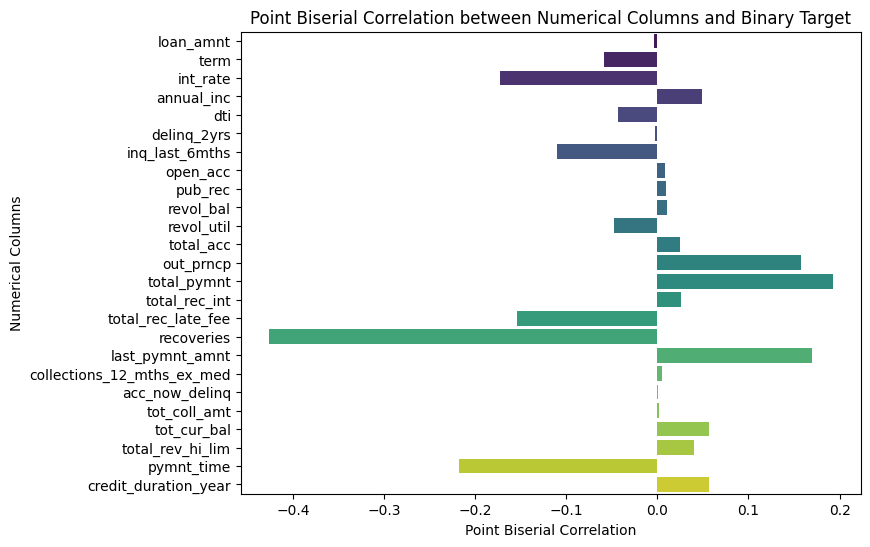

In [50]:

# Create a bar plot for visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_values, y=correlation_columns, palette='viridis')
plt.xlabel('Point Biserial Correlation')
plt.ylabel('Numerical Columns')
plt.title('Point Biserial Correlation between Numerical Columns and Binary Target')
plt.show()


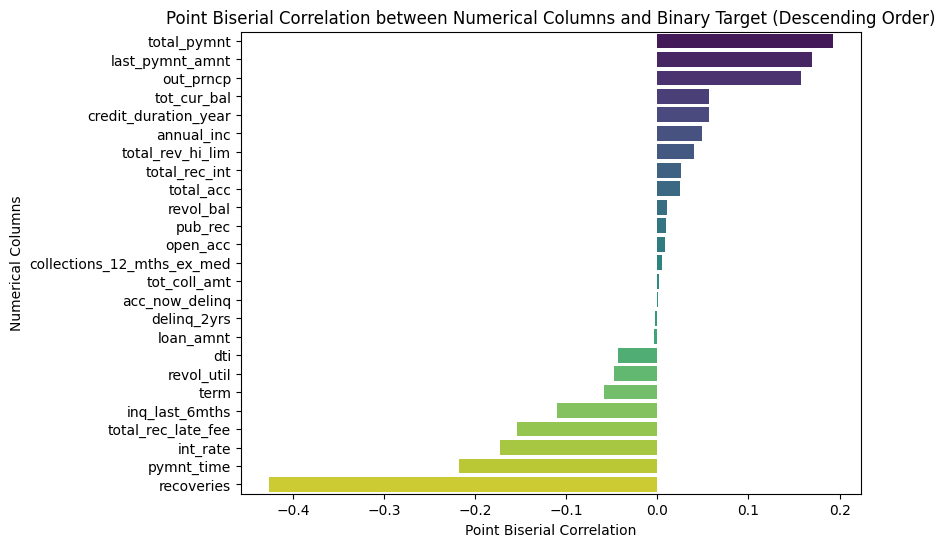

In [51]:
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_correlations]
sorted_values = [x[1] for x in sorted_correlations]

# Create a bar plot for visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_values, y=sorted_columns, palette='viridis')
plt.xlabel('Point Biserial Correlation')
plt.ylabel('Numerical Columns')
plt.title('Point Biserial Correlation between Numerical Columns and Binary Target (Descending Order)')
plt.show()

* Biserial is used between categorical binary (target) and numerical continuous.

* Several features has little correlation to target, but the deleted one only continuous data and not discrete.

* There is features that has smaller correlation than other, such as `revol_bar`. Remove the feature

In [52]:
df1 = df1.drop(columns = 'revol_bal')

In [53]:
df1.head()

loan_amnt  term  int_rate grade sub_grade emp_length home_ownership  \
0       5000    36     10.65     B        B2  10+ years           RENT   
1       2500    60     15.27     C        C4   < 1 year           RENT   
2       2400    36     15.96     C        C5  10+ years           RENT   
3      10000    36     13.49     C        C1  10+ years           RENT   
4       3000    60     12.69     B        B5     1 year           RENT   

   annual_inc verification_status  loan_status pymnt_plan         purpose  \
0     24000.0            Verified            1          n     credit_card   
1     30000.0     Source Verified            0          n             car   
2     12252.0        Not Verified            1          n  small_business   
3     49200.0     Source Verified            1          n           other   
4     80000.0     Source Verified            1          n           other   

     dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_util  \
0  27.65          0.0             1.0       3.0      0.0        83.7   
1   1.00          0.0             5.0       3.0      0.0         9.4   
2   8.72          0.0             2.0       2.0      0.0        98.5   
3  20.00          0.0             1.0      10.0      0.0        21.0   
4  17.94          0.0             0.0      15.0      0.0        53.9   

   total_acc initial_list_status  out_prncp   total_pymnt  total_rec_int  \
0        9.0                   f        0.0   5861.071414         861.07   
1        4.0                   f        0.0   1008.710000         435.17   
2       10.0                   f        0.0   3003.653644         603.65   
3       37.0                   f        0.0  12226.302210        2209.33   
4       38.0                   f      766.9   3242.170000        1009.07   

   total_rec_late_fee  recoveries  last_pymnt_amnt  \
0                0.00        0.00           171.62   
1                0.00      117.08           119.66   
2                0.00        0.00           649.91   
3               16.97        0.00           357.48   
4                0.00        0.00            67.79   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                         0.0             0.0           0.0      81539.0   
1                         0.0             0.0           0.0      81539.0   
2                         0.0             0.0           0.0      81539.0   
3                         0.0             0.0           0.0      81539.0   
4                         0.0             0.0           0.0      81539.0   

   total_rev_hi_lim  pymnt_time  credit_duration_year  
0           22800.0          13                    31  
1           22800.0          34                    14  
2           22800.0          20                    15  
3           22800.0          13                    19  
4           22800.0           1                    20

In [54]:
df1.tail()

loan_amnt  term  int_rate grade sub_grade emp_length home_ownership  \
466280      18400    60     14.47     C        C2    4 years       MORTGAGE   
466281      22000    60     19.97     D        D5  10+ years       MORTGAGE   
466282      20700    60     16.99     D        D1    7 years       MORTGAGE   
466283       2000    36      7.90     A        A4    3 years            OWN   
466284      10000    36     19.20     D        D3  10+ years       MORTGAGE   

        annual_inc verification_status  loan_status pymnt_plan  \
466280    110000.0     Source Verified            1          n   
466281     78000.0            Verified            0          n   
466282     46000.0            Verified            1          n   
466283     83000.0            Verified            1          n   
466284     46000.0            Verified            1          n   

                   purpose    dti  delinq_2yrs  inq_last_6mths  open_acc  \
466280  debt_consolidation  19.85          0.0             2.0      18.0   
466281  debt_consolidation  18.45          0.0             5.0      18.0   
466282  debt_consolidation  25.65          0.0             2.0      18.0   
466283         credit_card   5.39          3.0             1.0      21.0   
466284               other  22.78          1.0             0.0       6.0   

        pub_rec  revol_util  total_acc initial_list_status  out_prncp  \
466280      0.0        77.6       36.0                   w   12574.00   
466281      1.0        46.3       30.0                   f       0.00   
466282      0.0        51.1       43.0                   f   14428.31   
466283      0.0        21.5       27.0                   w       0.00   
466284      0.0        70.8       22.0                   f    3984.38   

         total_pymnt  total_rec_int  total_rec_late_fee  recoveries  \
466280  10383.360000        4557.36                 0.0         0.0   
466281   4677.920000        2840.88                 0.0         0.0   
466282  12343.980000        6072.29                 0.0         0.0   
466283   2126.579838         126.58                 0.0         0.0   
466284   8821.620000        2806.00                 0.0         0.0   

        last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  \
466280           432.64                         0.0             0.0   
466281            17.50                         0.0             0.0   
466282           514.34                         0.0             0.0   
466283          1500.68                         0.0             0.0   
466284           367.58                         0.0             0.0   

        tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  \
466280           0.0     294998.0           29900.0           1   
466281           0.0     221830.0           39400.0          14   
466282           0.0      73598.0           13100.0           1   
466283           0.0     591610.0           53100.0          14   
466284           0.0      57477.0           16000.0           1   

        credit_duration_year  
466280                    13  
466281                    19  
466282                    14  
466283                    12  
466284                    16

### Between Categorical

#### Check correlation to target

In [55]:
cats = df1.select_dtypes(include=['object']).columns.tolist()
cats

['grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'initial_list_status']

In [56]:
cats1 = ['grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'initial_list_status']

In [57]:
from scipy.stats import chi2_contingency

chi2_array, p_array = [], []
for column in cats1:

    crosstab = pd.crosstab(df[column], df['loan_status'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': cats1,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

Variable    Chi-square       p-value
1            sub_grade  22644.841385  0.000000e+00
7  initial_list_status  21188.884870  0.000000e+00
0                grade  20056.297700  0.000000e+00
6              purpose  11947.852945  0.000000e+00
4  verification_status   7546.378726  0.000000e+00
3       home_ownership   2996.966383  0.000000e+00
2           emp_length   2739.286208  0.000000e+00
5           pymnt_plan    155.723361  1.252449e-29

In summary, these results suggest that all the examined categorical variables are strongly associated with the 'loan_status'. The smaller p-values strongly support the rejection of the null hypothesis, indicating significant relationships between these variables.

#### Check correlation between features

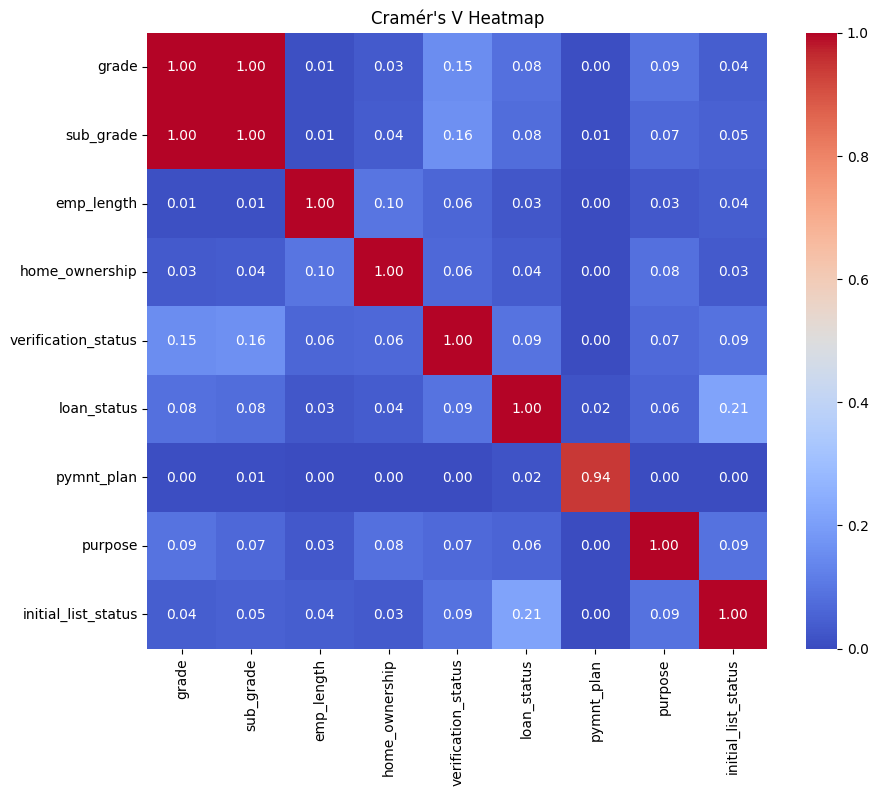

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency


categorical_columns = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'initial_list_status']

# Calculate Cramér's V for pairwise associations
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for all pairs of categorical columns
cramer_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for i in range(len(categorical_columns)):
    for j in range(len(categorical_columns)):
        cramer_matrix.iloc[i, j] = cramers_v(df[categorical_columns[i]], df[categorical_columns[j]])


cramer_matrix = cramer_matrix.astype(float)


plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramér's V Heatmap")
plt.show()


* colum `sub_grade` will be deleted due to high correlation to `grade`.


In [59]:
df1 = df1.drop( columns = ['sub_grade'])

## Univariate Analysis

### Numerical

In [60]:
df1.select_dtypes(include=np.number).describe().T

count           mean            std      min  \
loan_amnt                   466285.0   14317.277577    8286.509164   500.00   
term                        466285.0      42.605334      10.719040    36.00   
int_rate                    466285.0      13.829236       4.357587     5.42   
annual_inc                  466285.0   73277.293307   54963.341145  1896.00   
loan_status                 466285.0       0.883818       0.320444     0.00   
dti                         466285.0      17.218758       7.851121     0.00   
delinq_2yrs                 466285.0       0.284661       0.797343     0.00   
inq_last_6mths              466285.0       0.804695       1.091583     0.00   
open_acc                    466285.0      11.186995       4.987380     0.00   
pub_rec                     466285.0       0.160554       0.510848     0.00   
revol_util                  466285.0      56.177985      23.724005     0.00   
total_acc                   466285.0      25.064302      11.599792     1.00   
out_prncp                   466285.0    4410.062342    6355.078769     0.00   
total_pymnt                 466285.0   11540.686220    8265.627112     0.00   
total_rec_int               466285.0    2588.677225    2483.809661     0.00   
total_rec_late_fee          466285.0       0.650129       5.265730     0.00   
recoveries                  466285.0      85.344211     552.216084     0.00   
last_pymnt_amnt             466285.0    3123.913796    5554.737393     0.00   
collections_12_mths_ex_med  466285.0       0.009082       0.108632     0.00   
acc_now_delinq              466285.0       0.004002       0.068635     0.00   
tot_coll_amt                466285.0     162.989331   13482.891854     0.00   
tot_cur_bal                 466285.0  130171.381194  141672.898221     0.00   
total_rev_hi_lim            466285.0   29236.807894   34432.644961     0.00   
pymnt_time                  466285.0       8.911018      12.253806     0.00   
credit_duration_year        466285.0      18.267693       7.279543     1.00   

                                     25%           50%           75%  \
loan_amnt                    8000.000000  12000.000000   20000.00000   
term                           36.000000     36.000000      60.00000   
int_rate                       10.990000     13.660000      16.49000   
annual_inc                  45000.000000  63000.000000   88953.00000   
loan_status                     1.000000      1.000000       1.00000   
dti                            11.360000     16.870000      22.78000   
delinq_2yrs                     0.000000      0.000000       0.00000   
inq_last_6mths                  0.000000      0.000000       1.00000   
open_acc                        8.000000     10.000000      14.00000   
pub_rec                         0.000000      0.000000       0.00000   
revol_util                     39.200000     57.600000      74.70000   
total_acc                      17.000000     23.000000      32.00000   
out_prncp                       0.000000    441.470000    7341.65000   
total_pymnt                  5552.125349   9419.250943   15308.15846   
total_rec_int                 957.280000   1818.880000    3304.53000   
total_rec_late_fee              0.000000      0.000000       0.00000   
recoveries                      0.000000      0.000000       0.00000   
last_pymnt_amnt               312.620000    545.960000    3187.51000   
collections_12_mths_ex_med      0.000000      0.000000       0.00000   
acc_now_delinq                  0.000000      0.000000       0.00000   
tot_coll_amt                    0.000000      0.000000       0.00000   
tot_cur_bal                 33611.000000  81539.000000  184930.00000   
total_rev_hi_lim            15000.000000  22800.000000   34300.00000   
pymnt_time                      1.000000      2.000000      13.00000   
credit_duration_year           13.000000     17.000000      22.00000   

                                     max  
loan_amnt                   3.500000e+04  
term             

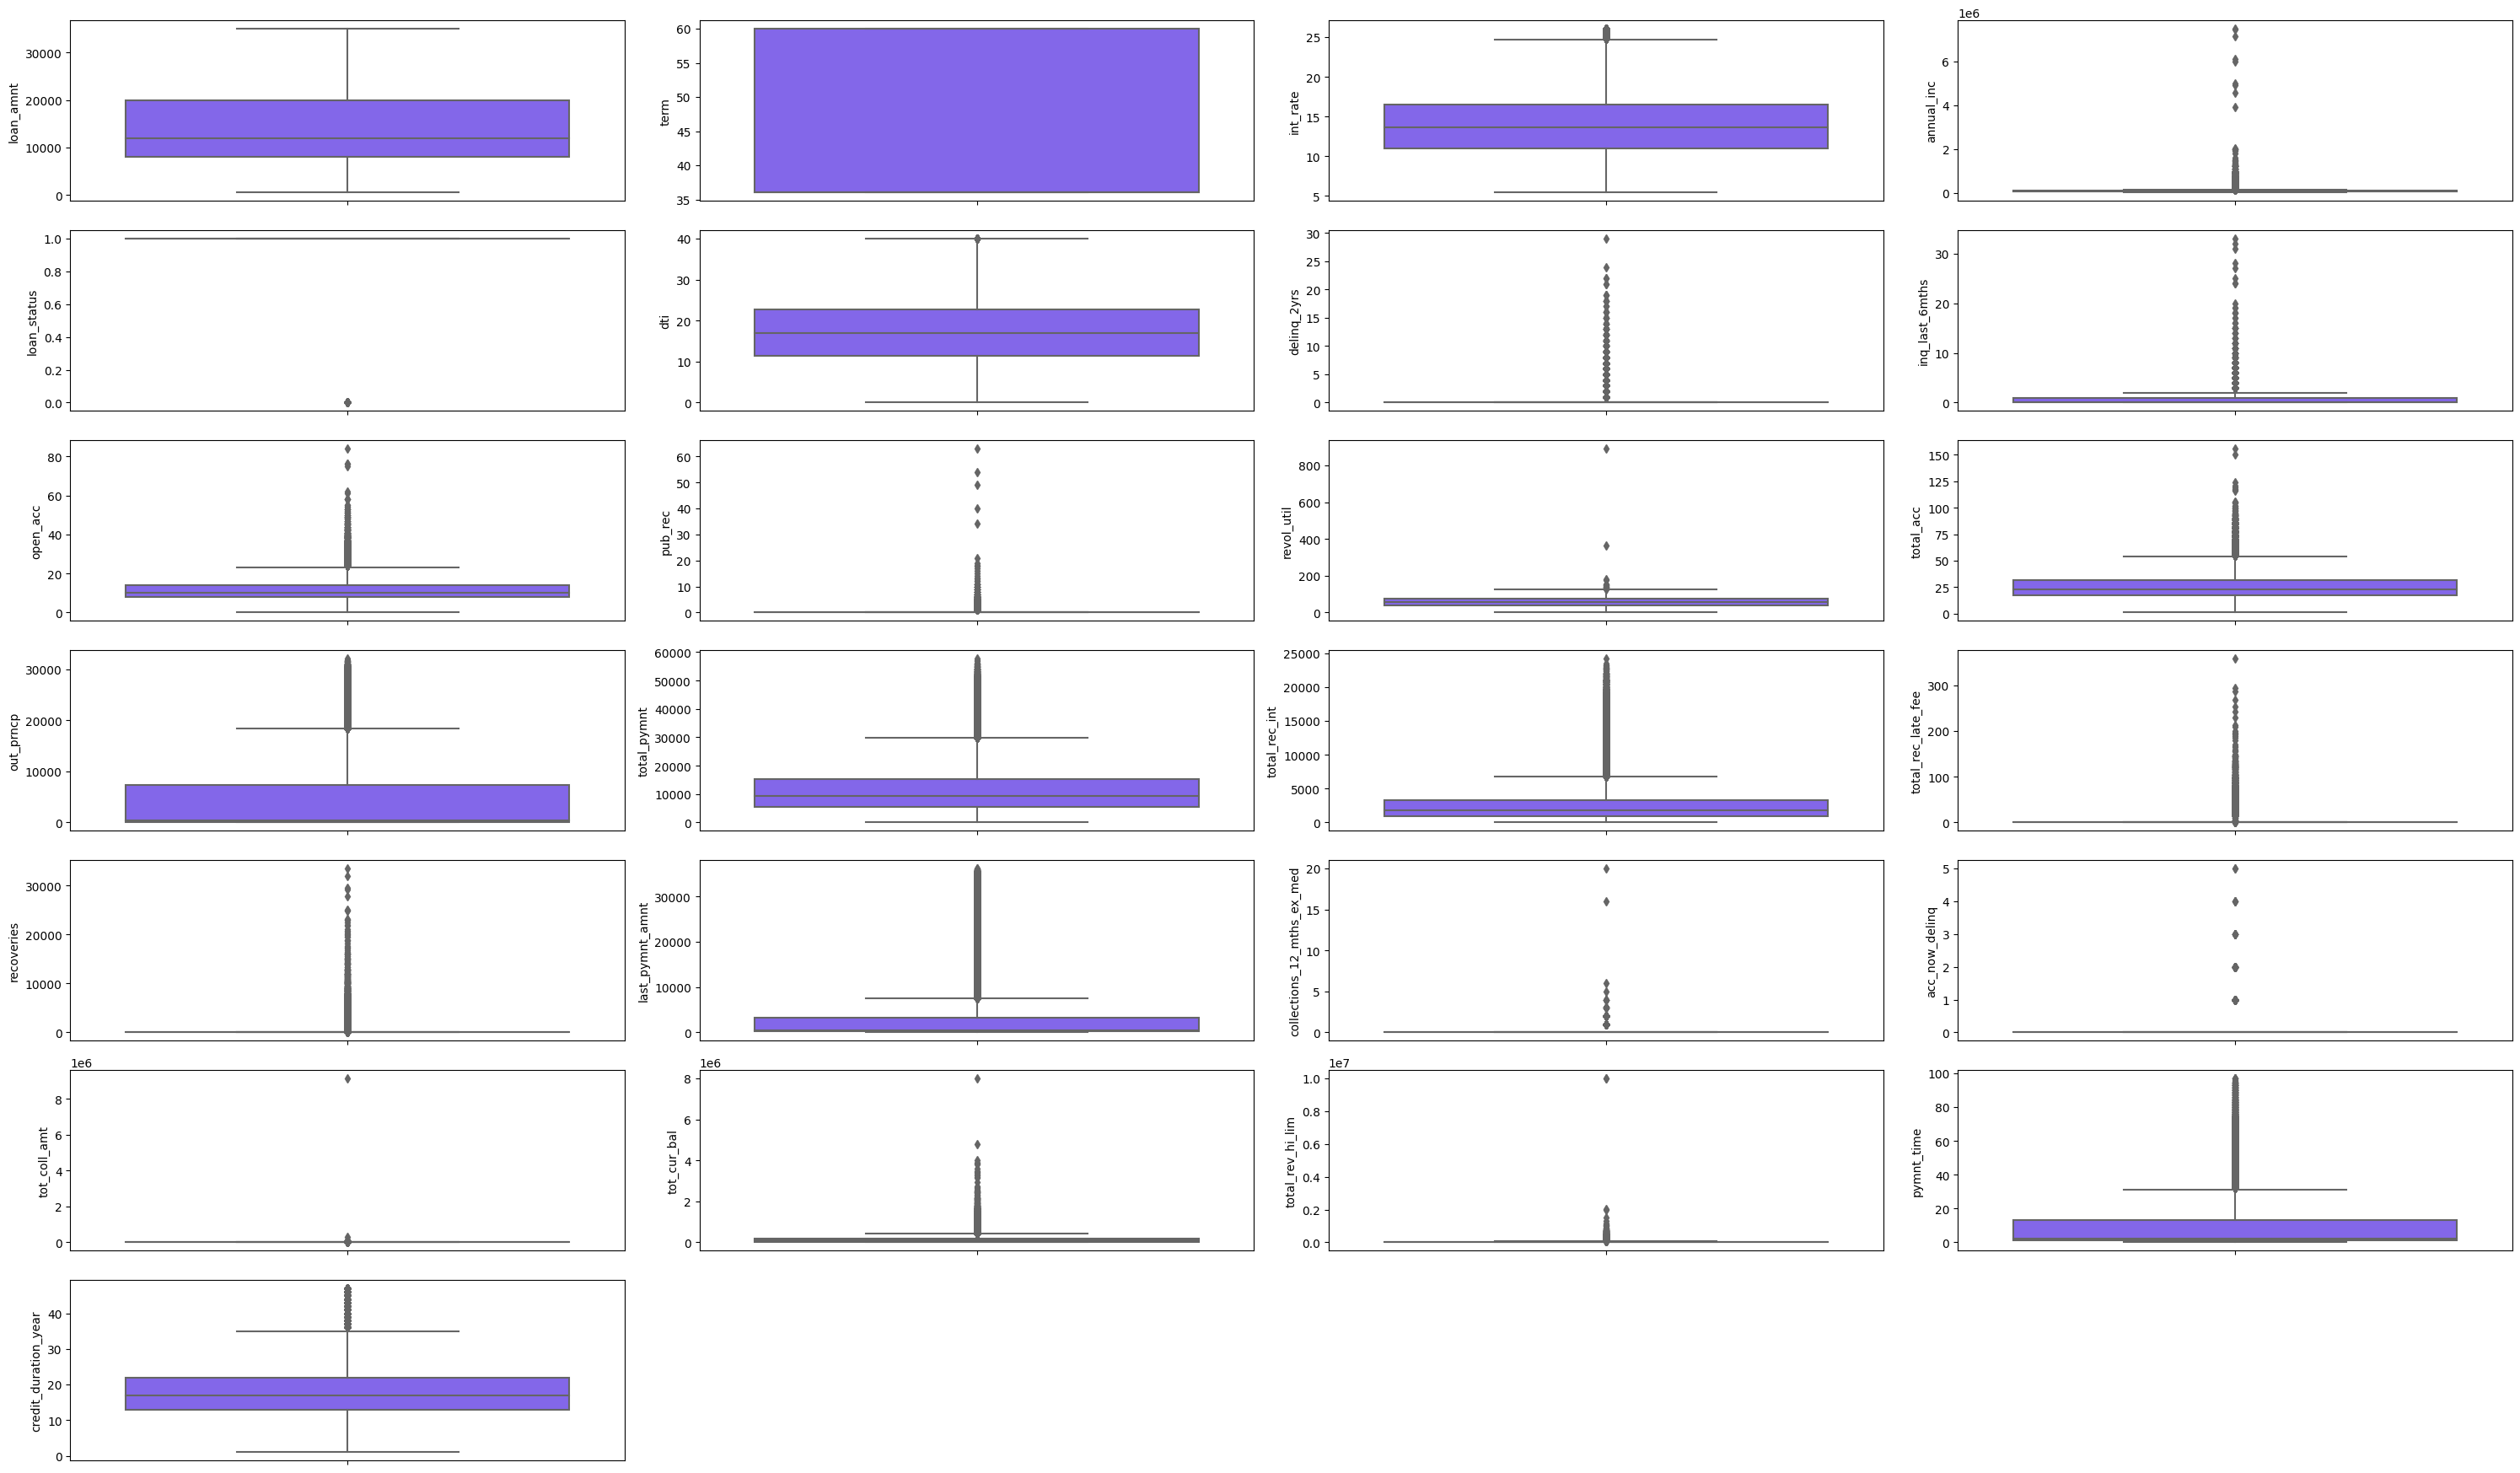

In [61]:
nums = df1.select_dtypes(include = np.number).columns.tolist()

features=nums

plt.figure(figsize=(30,25))
for i in range (0, len(features)):
    plt.subplot(10, 4,i+1)
    sns.boxplot(y=df1[features[i]], color='#7752FE', orient='v')
    plt.tight_layout()

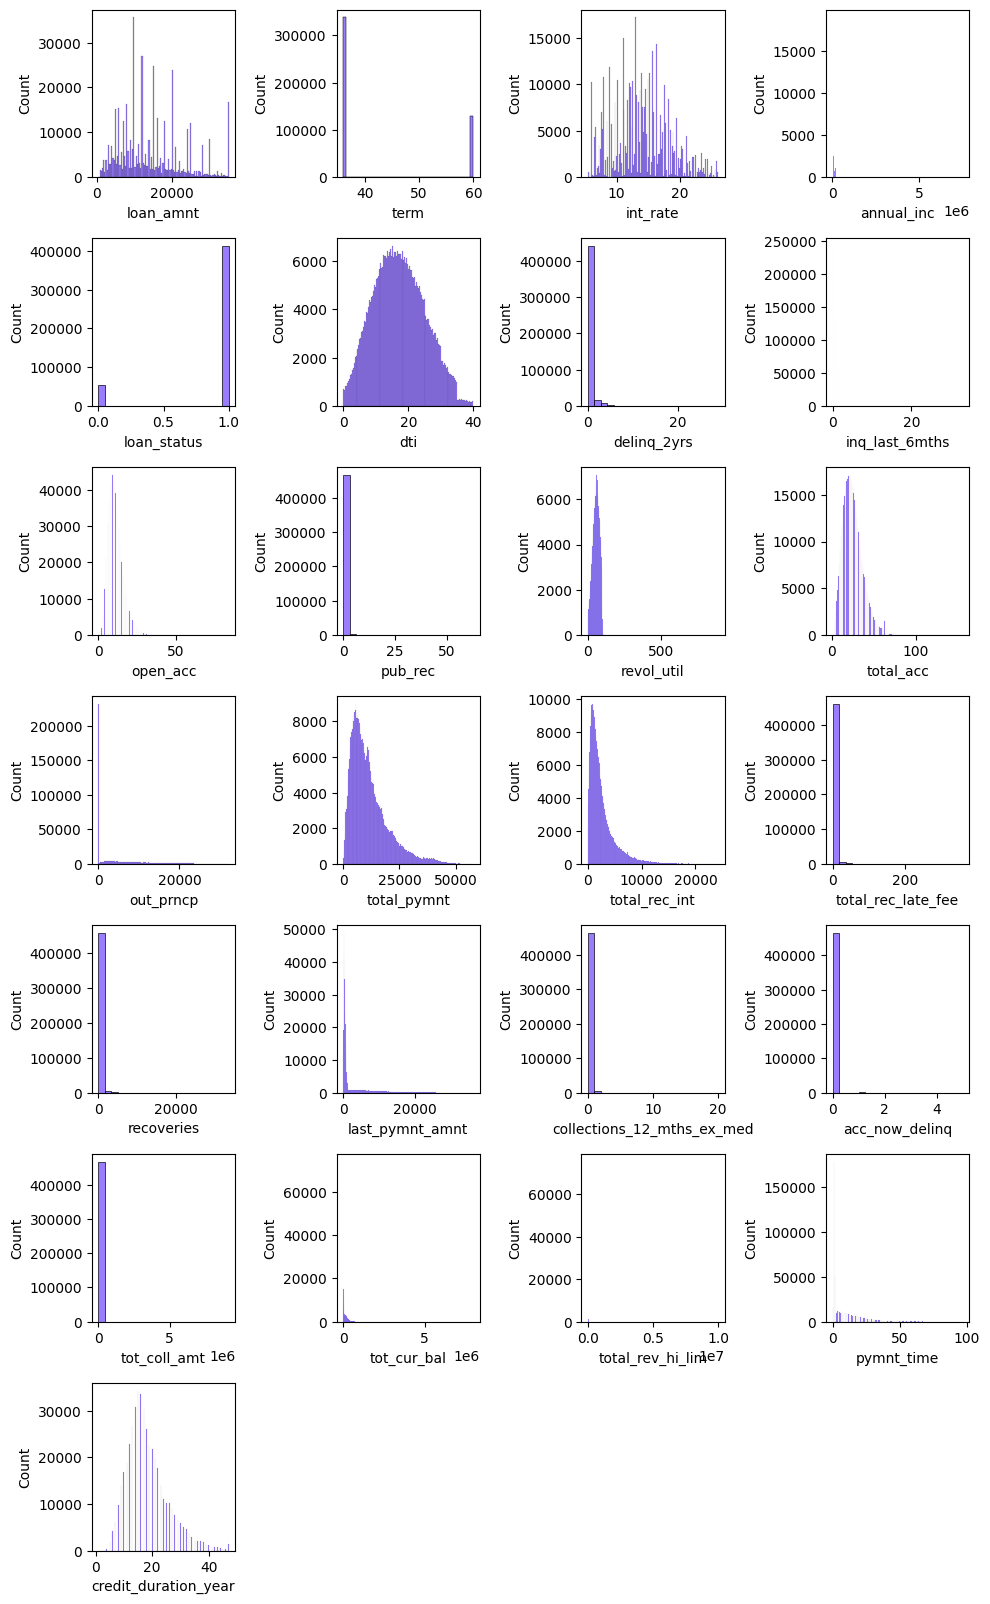

In [62]:
features = nums
n= round(len(nums)/3)
plt.rcParams['figure.figsize'] = (10, 18)

for i in range(0, len(features)):

    plt.subplot(n, math.ceil(len(features)/n), i+1)
    sns.histplot(x=df1[features[i]], color='#7752FE')
    plt.xlabel(features[i])
    plt.tight_layout()


plt.show()

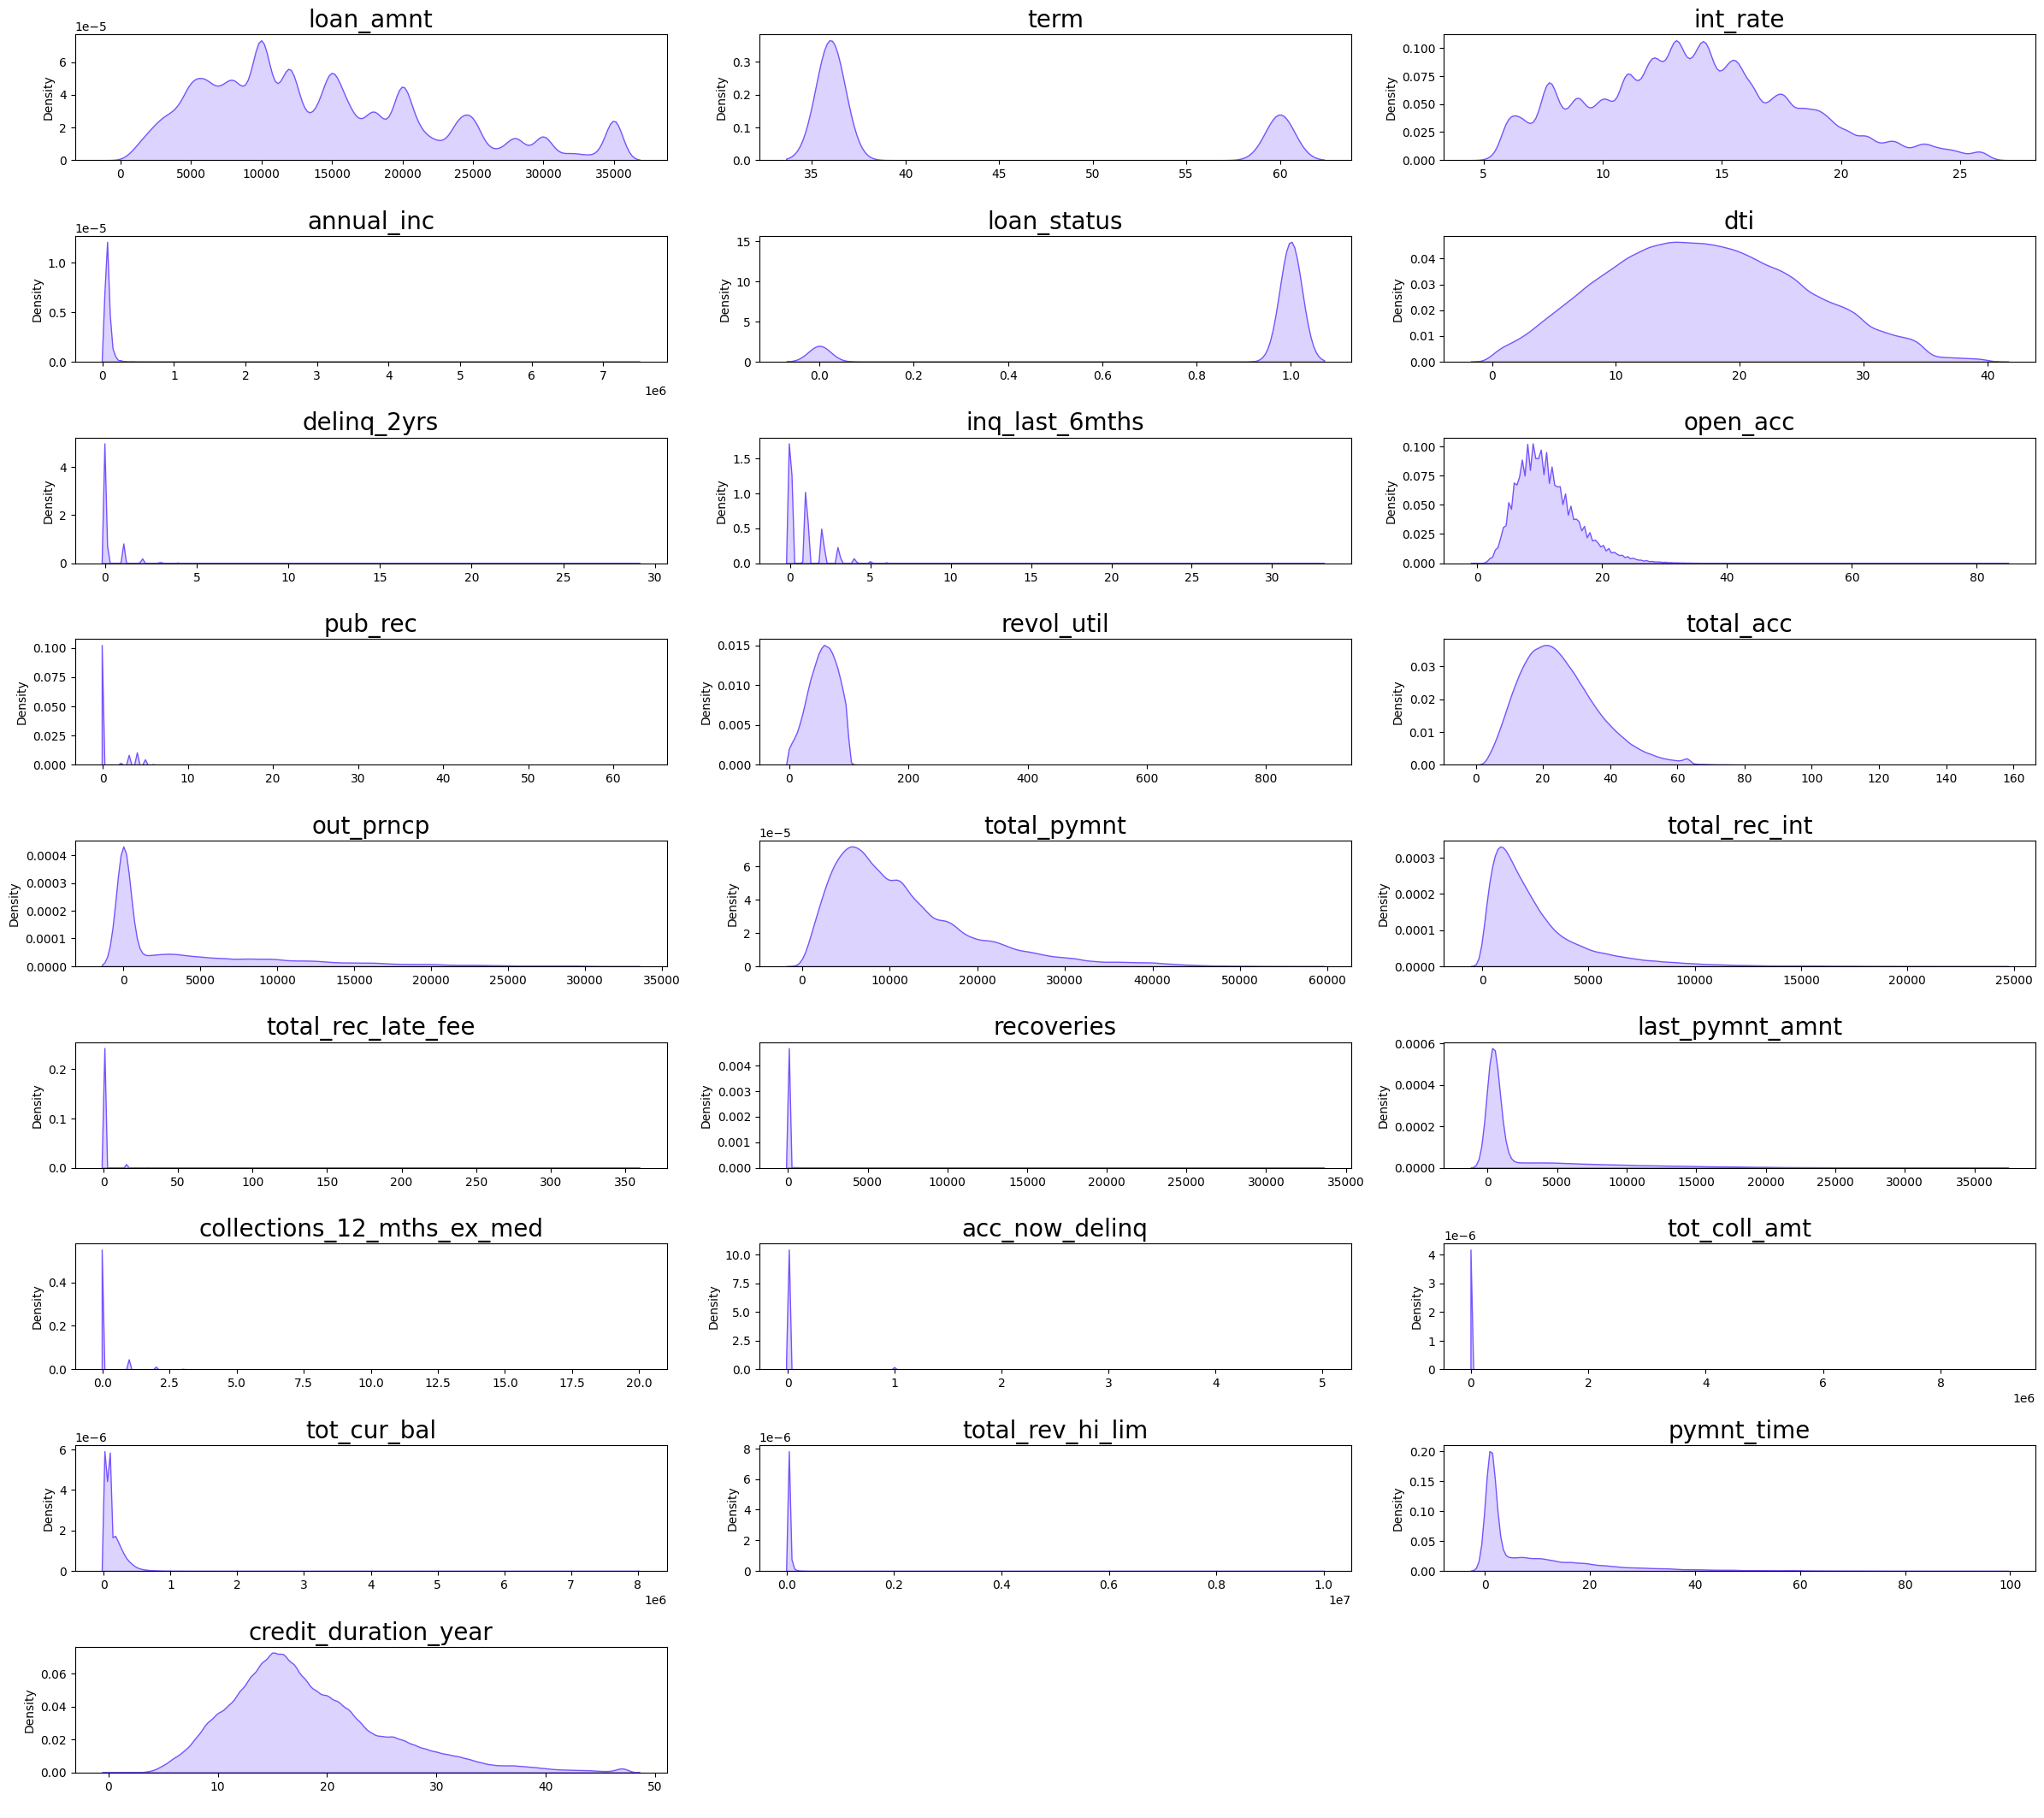

In [63]:
plt.figure(figsize=(24,28))

for i in range(0,len(nums)):

    plt.subplot(12,3,i+1)
    sns.kdeplot(x=df1[nums[i]], shade=True,color='#7752FE')
    plt.title(nums[i], fontsize=20)
    plt.xlabel(' ')

    plt.tight_layout()

Observations :         
* Most of features are founds to not normaly distributed and has outliers.

### Categorical

In [64]:
df.select_dtypes(include=['object']).describe().T

count  unique  \
term                 466285       2   
grade                466285       7   
sub_grade            466285      35   
emp_title            438697  205475   
emp_length           445277      11   
home_ownership       466285       6   
verification_status  466285       3   
issue_d              466285      91   
loan_status          466285       9   
pymnt_plan           466285       2   
url                  466285  466285   
desc                 125983  124436   
purpose              466285      14   
title                466265   63099   
zip_code             466285     888   
addr_state           466285      50   
earliest_cr_line     466256     664   
initial_list_status  466285       2   
last_pymnt_d         465909      98   
next_pymnt_d         239071     100   
last_credit_pull_d   466243     103   
application_type     466285       1   

                                                                                      top  \
term                                                                            36 months   
grade                                                                                   B   
sub_grade                                                                              B3   
emp_title                                                                         Teacher   
emp_length                                                                      10+ years   
home_ownership                                                                   MORTGAGE   
verification_status                                                              Verified   
issue_d                                                                            Oct-14   
loan_status                                                                       Current   
pymnt_plan                                                                              n   
url                  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501   
desc                                                                                        
purpose                                                                debt_consolidation   
title                                                                  Debt consolidation   
zip_code                                                                            945xx   
addr_state                                                                             CA   
earliest_cr_line                                                                   Oct-00   
initial_list_status                                                                     f   
last_pymnt_d                                                                       Jan-16   
next_pymnt_d                                                                       Feb-16   
last_credit_pull_d                                                                 Jan-16   
application_type                                                               INDIVIDUAL   

                       freq  
term                 337953  
grade                136929  
sub_grade             31686  
emp_title              5399  
emp_length           150049  
home_ownership       235875  
verification_status  168055  
issue_d               38782  
loan_status          224226  
pymnt_plan           466276  
url                       1  
desc                    234  
purpose              274195  
title                164075  
zip_code               5304  
addr_state            71450  
earliest_cr_line       3674  
initial_list_status  303005  
last_pymnt_d         179620  
next_pymnt_d         208393  
last_credit_pull_d   327699  
application_type     466285

In [65]:
cats = df1.select_dtypes(include=['object']).columns.tolist()
print(cats)

['grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']


In [66]:
df1.head()

loan_amnt  term  int_rate grade emp_length home_ownership  annual_inc  \
0       5000    36     10.65     B  10+ years           RENT     24000.0   
1       2500    60     15.27     C   < 1 year           RENT     30000.0   
2       2400    36     15.96     C  10+ years           RENT     12252.0   
3      10000    36     13.49     C  10+ years           RENT     49200.0   
4       3000    60     12.69     B     1 year           RENT     80000.0   

  verification_status  loan_status pymnt_plan         purpose    dti  \
0            Verified            1          n     credit_card  27.65   
1     Source Verified            0          n             car   1.00   
2        Not Verified            1          n  small_business   8.72   
3     Source Verified            1          n           other  20.00   
4     Source Verified            1          n           other  17.94   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0          0.0             1.0       3.0      0.0        83.7        9.0   
1          0.0             5.0       3.0      0.0         9.4        4.0   
2          0.0             2.0       2.0      0.0        98.5       10.0   
3          0.0             1.0      10.0      0.0        21.0       37.0   
4          0.0             0.0      15.0      0.0        53.9       38.0   

  initial_list_status  out_prncp   total_pymnt  total_rec_int  \
0                   f        0.0   5861.071414         861.07   
1                   f        0.0   1008.710000         435.17   
2                   f        0.0   3003.653644         603.65   
3                   f        0.0  12226.302210        2209.33   
4                   f      766.9   3242.170000        1009.07   

   total_rec_late_fee  recoveries  last_pymnt_amnt  \
0                0.00        0.00           171.62   
1                0.00      117.08           119.66   
2                0.00        0.00           649.91   
3               16.97        0.00           357.48   
4                0.00        0.00            67.79   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                         0.0             0.0           0.0      81539.0   
1                         0.0             0.0           0.0      81539.0   
2                         0.0             0.0           0.0      81539.0   
3                         0.0             0.0           0.0      81539.0   
4                         0.0             0.0           0.0      81539.0   

   total_rev_hi_lim  pymnt_time  credit_duration_year  
0           22800.0          13                    31  
1           22800.0          34                    14  
2           22800.0          20                    15  
3           22800.0          13                    19  
4           22800.0           1                    20

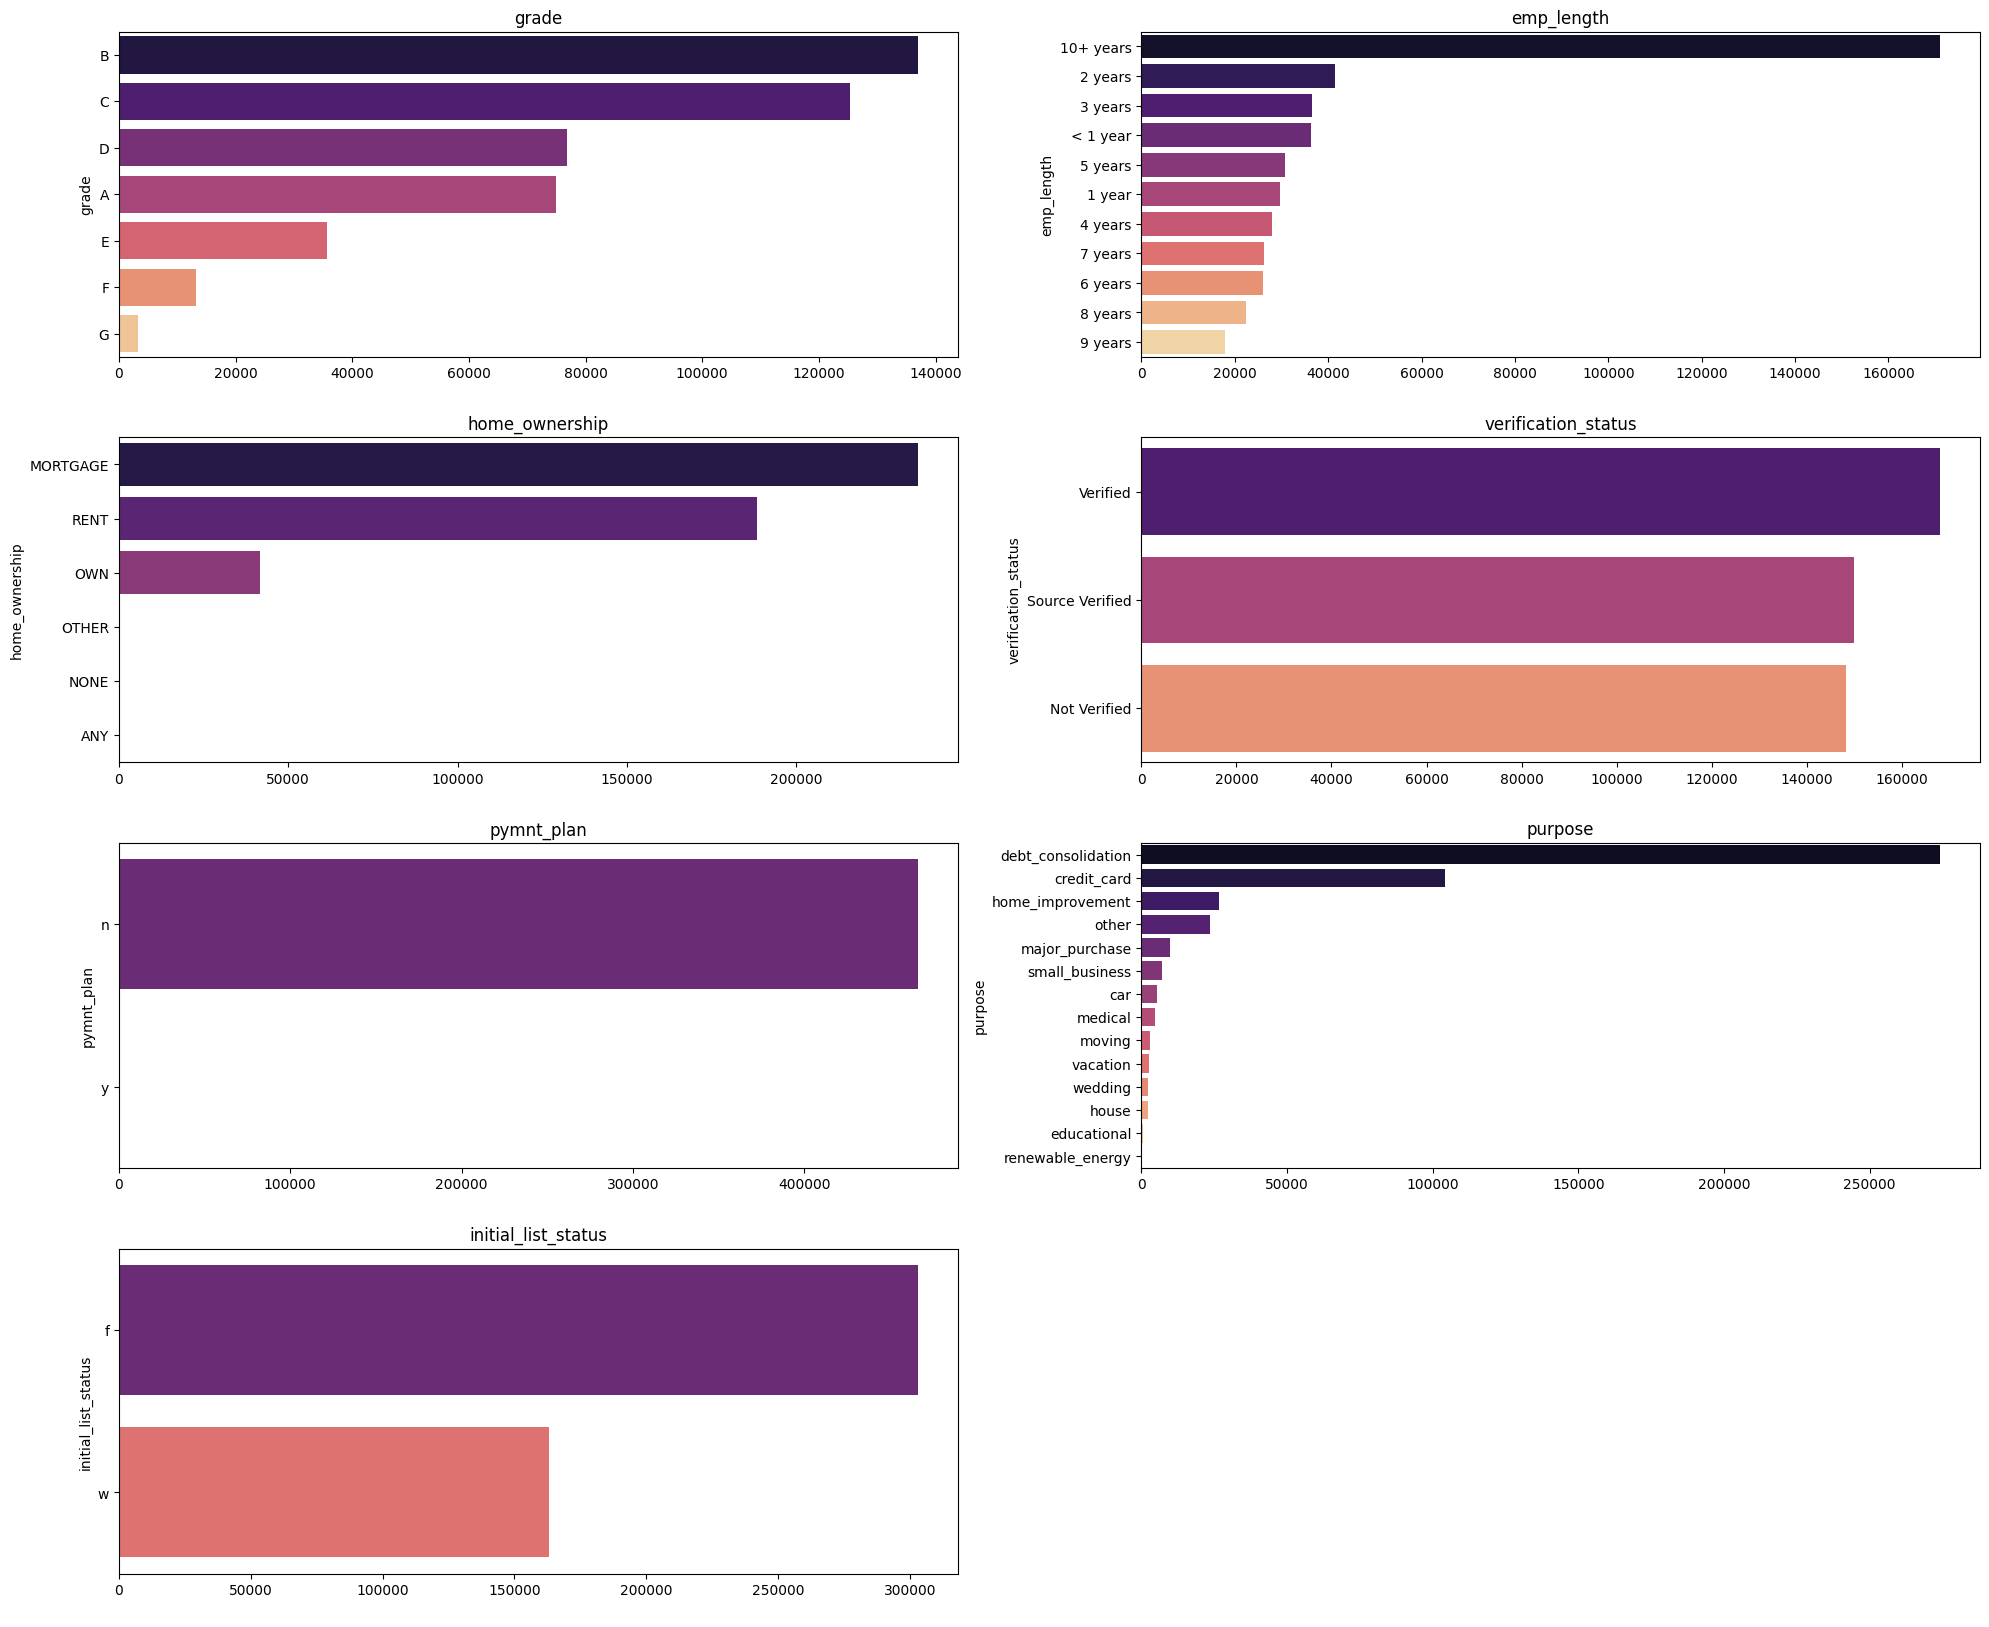

In [67]:
plt.figure(figsize=(20,20))
count_df = df1.copy()

for col in cats:
    count_df[col] = df1[col].value_counts()

sorted_cats = count_df.sum().sort_values(ascending=False).index

for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(y=df1[cats[i]], order=df1[cats[i]].value_counts().index, orient='h', palette='magma')
    plt.title(cats[i])
    plt.xlabel(' ')
    plt.tight_layout()

plt.show()

Observation :             
* `Grade` is dominated by B
* `emp_length` feature is dominated by emp_length >10 years
* `home_ownership` feature is dominated by mortgage
* `verification_status` feature is dominated by verified
* `purpose feature` is dominated by debt_consolidation
* `initial_list_status` feature is dominated by f
* `pymnt_plan` only show one value that is n, it shows that the feature only have 1 unique value. It will cause problem when training model and is decided to drop the column.

In [68]:
df1 = df1.drop(columns = 'pymnt_plan')

## Bivariate Analysis

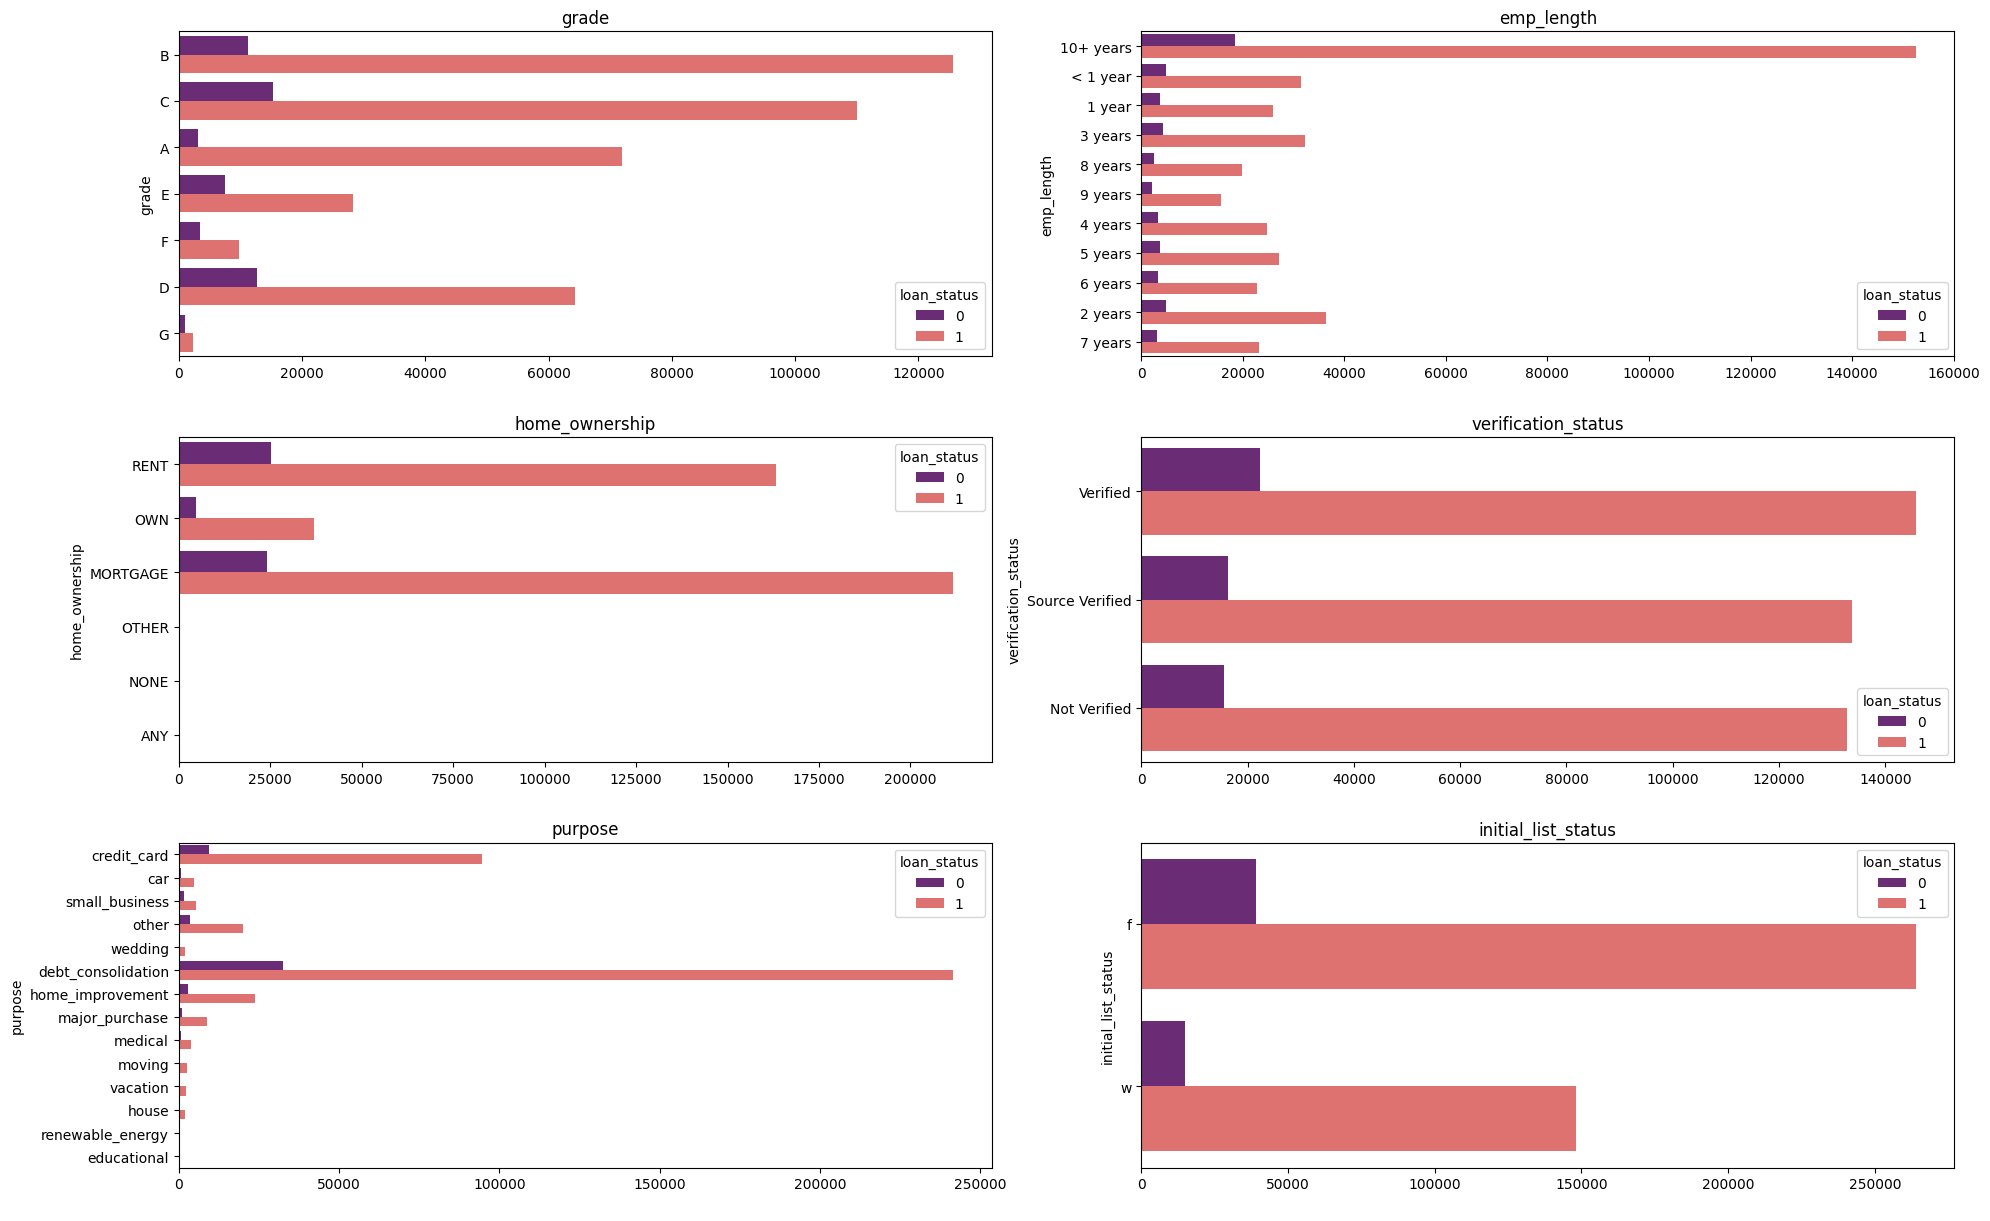

In [69]:
plt.figure(figsize=(20,20))

cats = df1.select_dtypes(include=['object']).columns.tolist()

for i in range(0,len(cats)):
    plt.subplot(5,2,i+1)
    sns.countplot(y=df1[cats[i]], palette='magma', hue=df1['loan_status'])
    plt.title(cats[i])
    plt.xlabel(' ')
    plt.tight_layout()

<ipython-input-70-d05693dae6e9>:2: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `x`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=df1, x='total_pymnt', palette='magma', hue=df1['loan_status'], vertical = False)


<Axes: xlabel='total_pymnt', ylabel='Density'>

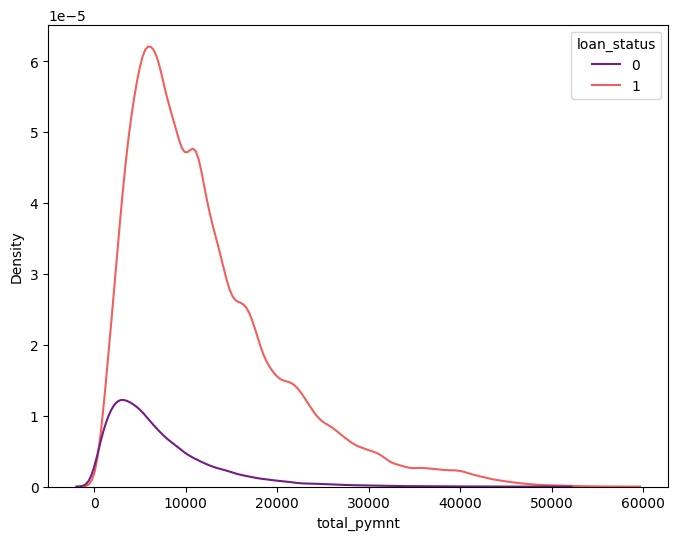

In [70]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df1, x='total_pymnt', palette='magma', hue=df1['loan_status'], vertical = False)

# Feature engineering

## Weight Of Evidence and Information value

reference : https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  int64  
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_length                  466285 non-null  object 
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466285 non-null  float64
 7   verification_status         466285 non-null  object 
 8   loan_status                 466285 non-null  int64  
 9   purpose                     466285 non-null  object 
 10  dti                         466285 non-null  float64
 11  delinq_2yrs                 466285 non-null  float64
 12  inq_last_6mths              466285 non-null  float64
 13  open_acc      

In [72]:
nums = df1.select_dtypes(include = np.number).columns.tolist()
cats = df1.select_dtypes(include=['object']).columns.tolist()

In [73]:
df2 = df1.copy()

In [74]:
def woe(df, feature_name):
    feature_name = df.groupby(feature_name).agg(num_observation=('loan_status','count'),good_loan_prob=('loan_status','mean')).reset_index()

    feature_name['grade_proportion'] = feature_name['num_observation']/feature_name['num_observation'].sum()

    feature_name['num_good_loan'] = feature_name['grade_proportion'] * feature_name['num_observation']

    feature_name['num_bad_loan'] = (1-feature_name['grade_proportion']) * feature_name['num_observation']

    feature_name['good_loan_prop'] = feature_name['num_good_loan'] / feature_name['num_good_loan'].sum()

    feature_name['bad_loan_prop'] = feature_name['num_bad_loan'] / feature_name['num_bad_loan'].sum()

    feature_name['weight_of_evidence'] = np.log(feature_name['good_loan_prop'] / feature_name['bad_loan_prop'])

    feature_name = feature_name.sort_values('weight_of_evidence').reset_index(drop=True)

    feature_name['information_value'] = (feature_name['good_loan_prop']-feature_name['bad_loan_prop']) * feature_name['weight_of_evidence']

    feature_name['information_value'] = feature_name['information_value'].sum()

    # Visualize
    feature_name = feature_name.drop(['grade_proportion','num_good_loan','num_bad_loan','good_loan_prop','bad_loan_prop'],axis = 1)
    return feature_name

In [75]:
def dist(feature):
    plt.figure(figsize=(4,2))
    sns.violinplot(df2[feature],color='#7752FE', orient = 'h')
    print('number of unique values :',df2[feature].nunique())
    print('Distribution :')
    print(df2[feature].describe().T)

Whether the features are used or not will be based on this information

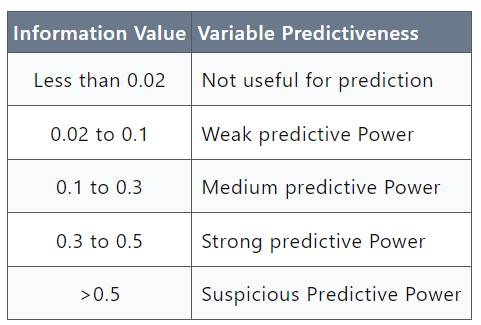

### Categorical

In [76]:
cats.append('term')
print(cats)

['grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'term']


In [77]:
for col in cats:
  print(f'\n\n\nWOE features `{col}`')
  display(woe(df2, col))




WOE features `grade`


grade  num_observation  good_loan_prob  weight_of_evidence  \
0     G             3322        0.679711           -3.660567   
1     F            13229        0.741401           -2.257091   
2     E            35757        0.789775           -1.211753   
3     A            74867        0.959328           -0.377550   
4     D            76888        0.835787           -0.345737   
5     C           125293        0.878493            0.275309   
6     B           136929        0.917643            0.398836   

   information_value  
0           0.292639  
1           0.292639  
2           0.292639  
3           0.292639  
4           0.292639  
5           0.292639  
6           0.292639




WOE features `emp_length`


emp_length  num_observation  good_loan_prob  weight_of_evidence  \
0     9 years            17888        0.881093           -1.682895   
1     8 years            22395        0.884349           -1.448086   
2     6 years            26112        0.876800           -1.286119   
3     7 years            26180        0.883613           -1.283364   
4     4 years            28023        0.882240           -1.211138   
5      1 year            29622        0.877017           -1.151991   
6     5 years            30774        0.878696           -1.111196   
7    < 1 year            36265        0.867944           -0.934325   
8     3 years            36596        0.882446           -0.924469   
9     2 years            41373        0.881251           -0.790600   
10  10+ years           171057        0.891773            0.992902   

    information_value  
0            1.030304  
1            1.030304  
2            1.030304  
3            1.030304  
4            1.030304  
5            1.030304  
6            1.030304  
7            1.030304  
8            1.030304  
9            1.030304  
10           1.030304




WOE features `home_ownership`


home_ownership  num_observation  good_loan_prob  weight_of_evidence  \
0            ANY                1        1.000000          -12.759563   
1           NONE               50        0.760000           -8.847435   
2          OTHER              182        0.642857           -7.555168   
3            OWN            41704        0.885359           -2.027518   
4           RENT           188473        0.866501           -0.095002   
5       MORTGAGE           235875        0.897594            0.316429   

   information_value  
0            0.31222  
1            0.31222  
2            0.31222  
3            0.31222  
4            0.31222  
5            0.31222




WOE features `verification_status`


verification_status  num_observation  good_loan_prob  weight_of_evidence  \
0        Not Verified           148237        0.895262           -0.075220   
1     Source Verified           149993        0.891342           -0.057908   
2            Verified           168055        0.867008            0.114596   

   information_value  
0           0.007663  
1           0.007663  
2           0.007663




WOE features `purpose`


purpose  num_observation  good_loan_prob  weight_of_evidence  \
0     renewable_energy              351        0.840456           -6.796087   
1          educational              422        0.637441           -6.611715   
2                house             2269        0.843543           -4.925653   
3              wedding             2343        0.860009           -4.893401   
4             vacation             2487        0.872135           -4.833445   
5               moving             2994        0.834335           -4.646819   
6              medical             4602        0.856584           -4.213461   
7                  car             5397        0.900130           -4.052385   
8       small_business             7013        0.766862           -3.786951   
9       major_purchase             9828        0.891941           -3.443333   
10               other            23690        0.846264           -2.532676   
11    home_improvement            26537        0.893922           -2.412735   
12         credit_card           104157        0.909070           -0.851172   
13  debt_consolidation           274195        0.880946            0.750802   

    information_value  
0            1.409257  
1            1.409257  
2            1.409257  
3            1.409257  
4            1.409257  
5            1.409257  
6            1.409257  
7            1.409257  
8            1.409257  
9            1.409257  
10           1.409257  
11           1.409257  
12           1.409257  
13           1.409257




WOE features `initial_list_status`


initial_list_status  num_observation  good_loan_prob  weight_of_evidence  \
0                   w           163280        0.907741           -0.798355   
1                   f           303005        0.870926            0.438211   

   information_value  
0           0.340013  
1           0.340013




WOE features `term`


term  num_observation  good_loan_prob  weight_of_evidence  \
0    60           128332        0.853458           -1.378129   
1    36           337953        0.895346            0.558444   

   information_value  
0            0.72423  
1            0.72423

Observation :        
* Of all categorical feature, `verification_status` has low information value. So it is decided to drop the column

## Numerical

In [69]:
print(nums)
del nums[1]
print(nums)
len(nums)

['loan_amnt', 'term', 'int_rate', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'pymnt_time', 'credit_duration_year']
['loan_amnt', 'int_rate', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'pymnt_time', 'credit_duration_year']


24

### feature `loan_amnt`

number of unique values : 1352
Distribution :
count    466285.000000
mean      14317.277577
std        8286.509164
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64


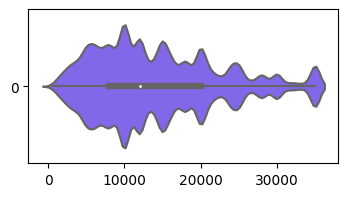

In [70]:
dist('loan_amnt')

In [79]:
df2['loan_amnt_woe'] = pd.cut(df2['loan_amnt'],10)
woe(df2,'loan_amnt_woe')

### feature `int_rate`

number of unique values : 506
Distribution :
count    466285.000000
mean         13.829236
std           4.357587
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64


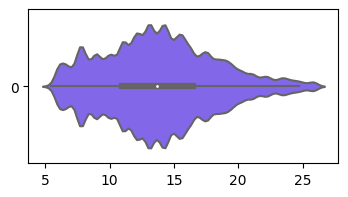

In [74]:
dist('int_rate')

In [75]:
df2['annual_inc_woe'] = pd.cut(df2['annual_inc'],10)
woe(df2,'annual_inc_woe')

annual_inc_woe  num_observation  good_loan_prob  \
0  (3750948.0, 4500758.4]                1        1.000000   
1  (5250568.8, 6000379.2]                1        1.000000   
2  (6000379.2, 6750189.6]                1        1.000000   
3  (4500758.4, 5250568.8]                3        1.000000   
4  (6750189.6, 7500000.0]                3        1.000000   
5  (1501516.8, 2251327.2]               10        1.000000   
6   (751706.4, 1501516.8]              143        0.916084   
7   (-5602.104, 751706.4]           466123        0.883803   
8  (2251327.2, 3001137.6]                0             NaN   
9  (3001137.6, 3750948.0]                0             NaN   

   weight_of_evidence  information_value  
0          -20.323974              8.227  
1          -20.323974              8.227  
2          -20.323974              8.227  
3          -19.225357              8.227  
4          -19.225357              8.227  
5          -18.021370              8.227  
6          -15.360825              8.227  
7            0.693185              8.227  
8                 NaN              8.227  
9                 NaN              8.227

### feature `annual_inc`

number of unique values : 31901
Distribution :
count    4.662850e+05
mean     7.327729e+04
std      5.496334e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.895300e+04
max      7.500000e+06
Name: annual_inc, dtype: float64


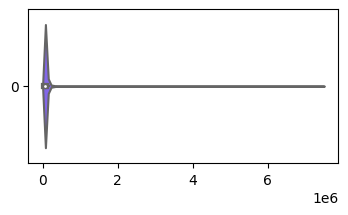

In [80]:
dist('annual_inc')


In [81]:
df2['annual_inc_woe'] = pd.cut(df2['annual_inc'],10)
woe(df2,'annual_inc_woe')

annual_inc_woe  num_observation  good_loan_prob  \
0  (3750948.0, 4500758.4]                1        1.000000   
1  (5250568.8, 6000379.2]                1        1.000000   
2  (6000379.2, 6750189.6]                1        1.000000   
3  (4500758.4, 5250568.8]                3        1.000000   
4  (6750189.6, 7500000.0]                3        1.000000   
5  (1501516.8, 2251327.2]               10        1.000000   
6   (751706.4, 1501516.8]              143        0.916084   
7   (-5602.104, 751706.4]           466123        0.883803   
8  (2251327.2, 3001137.6]                0             NaN   
9  (3001137.6, 3750948.0]                0             NaN   

   weight_of_evidence  information_value  
0          -20.323974              8.227  
1          -20.323974              8.227  
2          -20.323974              8.227  
3          -19.225357              8.227  
4          -19.225357              8.227  
5          -18.021370              8.227  
6          -15.360825              8.227  
7            0.693185              8.227  
8                 NaN              8.227  
9                 NaN              8.227

In [82]:
# This column will be grouped

df2['annual_inc_fc'] = np.where((df2['annual_inc']>=0)&(df2['annual_inc']<=200000),'low_income',
                               np.where((df2['annual_inc']>200000)&(df2['annual_inc']<=1500000),'med_income','high_income'))
woe(df2,'annual_inc_fc')

annual_inc_fc  num_observation  good_loan_prob  weight_of_evidence  \
0   high_income               19        1.000000          -13.488976   
1    med_income             7781        0.919548           -7.457187   
2    low_income           458485        0.883207            0.692901   

   information_value  
0           4.080337  
1           4.080337  
2           4.080337

Due to high information value, the feature will be dropped

### feature `dti`

number of unique values : 3997
Distribution :
count    466285.000000
mean         17.218758
std           7.851121
min           0.000000
25%          11.360000
50%          16.870000
75%          22.780000
max          39.990000
Name: dti, dtype: float64


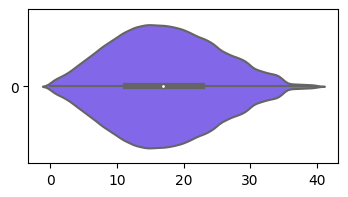

In [83]:
dist('dti')


In [84]:
df2['dti_woe'] = pd.cut(df2['dti'],10)
woe(df2,'dti_woe')

dti_woe  num_observation  good_loan_prob  weight_of_evidence  \
0   (35.991, 39.99]             2753        0.875772           -3.292330   
1  (31.992, 35.991]            13654        0.862604           -1.667191   
2    (-0.04, 3.999]            16728        0.891619           -1.457325   
3  (27.993, 31.992]            30288        0.861826           -0.833030   
4    (3.999, 7.998]            42962        0.905544           -0.453966   
5  (23.994, 27.993]            50073        0.865037           -0.283859   
6   (7.998, 11.997]            69311        0.900853            0.088587   
7  (19.995, 23.994]            71058        0.869726            0.117890   
8  (15.996, 19.995]            84089        0.881435            0.319796   
9  (11.997, 15.996]            85369        0.894072            0.338258   

   information_value  
0           0.215744  
1           0.215744  
2           0.215744  
3           0.215744  
4           0.215744  
5           0.215744  
6           0.215744  
7           0.215744  
8           0.215744  
9           0.215744

### feture `delinq_2yrs`

number of unique values : 24
Distribution :
count    466285.000000
mean          0.284661
std           0.797343
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64


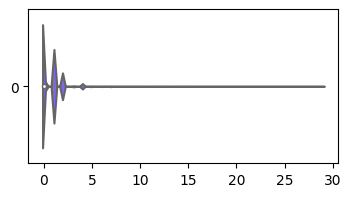

In [85]:
dist('delinq_2yrs')


In [86]:
df2['delinq_2yrs_woe'] = pd.cut(df2['delinq_2yrs'],10)
woe(df2,'delinq_2yrs_woe')

delinq_2yrs_woe  num_observation  good_loan_prob  weight_of_evidence  \
0    (23.2, 26.1]                1        1.000000          -16.101818   
1    (26.1, 29.0]                1        1.000000          -16.101818   
2    (20.3, 23.2]                4        0.750000          -14.715518   
3    (17.4, 20.3]                9        0.888889          -13.904577   
4    (14.5, 17.4]               15        0.866667          -13.393738   
5    (11.6, 14.5]               71        0.746479          -11.838988   
6     (8.7, 11.6]              217        0.884793          -10.721458   
7      (5.8, 8.7]             1152        0.879340           -9.050092   
8      (2.9, 5.8]             9298        0.881157           -6.944124   
9   (-0.029, 2.9]           455517        0.883906            0.695586   

   information_value  
0           4.007423  
1           4.007423  
2           4.007423  
3           4.007423  
4           4.007423  
5           4.007423  
6           4.007423  
7           4.007423  
8           4.007423  
9           4.007423

Due to high information value, the feature will be dropped

### feature `inq_last_6mths`

number of unique values : 28
Distribution :
count    466285.000000
mean          0.804695
std           1.091583
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64


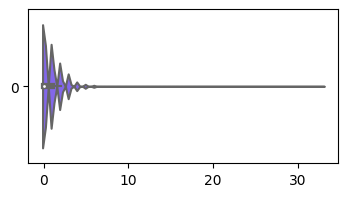

In [87]:
dist('inq_last_6mths')


In [88]:
df2['inq_last_6mths_woe'] = pd.cut(df2['inq_last_6mths'],10)
woe(df2,'inq_last_6mths_woe')

inq_last_6mths_woe  num_observation  good_loan_prob  weight_of_evidence  \
0       (19.8, 23.1]                1        0.000000          -16.022424   
1       (26.4, 29.7]                2        0.000000          -15.329275   
2       (23.1, 26.4]                3        0.000000          -14.923808   
3       (29.7, 33.0]                3        0.000000          -14.923808   
4       (16.5, 19.8]                8        0.000000          -13.942968   
5       (13.2, 16.5]               18        0.000000          -13.132016   
6        (9.9, 13.2]               60        0.000000          -11.927953   
7         (6.6, 9.9]              367        0.147139          -10.116277   
8         (3.3, 6.6]            11197        0.737162           -6.674719   
9      (-0.033, 3.3]           454626        0.888209            0.693523   

   information_value  
0           3.763579  
1           3.763579  
2           3.763579  
3           3.763579  
4           3.763579  
5           3.763579  
6           3.763579  
7           3.763579  
8           3.763579  
9           3.763579

high information value, the feature will be dropped

### feature `open_acc`

number of unique values : 62
Distribution :
count    466285.000000
mean         11.186995
std           4.987380
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64


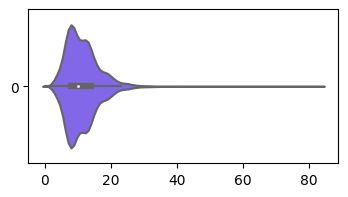

In [89]:
dist('open_acc')


In [90]:
df2['open_acc_woe'] = pd.cut(df2['open_acc'],10)
woe(df2,'open_acc_woe')

open_acc_woe  num_observation  good_loan_prob  weight_of_evidence  \
0   (67.2, 75.6]                1        1.000000          -12.699435   
1   (58.8, 67.2]                2        1.000000          -12.006286   
2   (75.6, 84.0]                3        0.333333          -11.600819   
3   (50.4, 58.8]               20        1.000000           -9.703662   
4   (42.0, 50.4]               81        0.901235           -8.304815   
5   (33.6, 42.0]              817        0.884945           -5.992045   
6   (25.2, 33.6]             5131        0.890275           -4.145317   
7   (16.8, 25.2]            56491        0.886601           -1.628458   
8  (-0.084, 8.4]           151903        0.881701           -0.374252   
9    (8.4, 16.8]           251836        0.884326            0.513821   

   information_value  
0           0.523715  
1           0.523715  
2           0.523715  
3           0.523715  
4           0.523715  
5           0.523715  
6           0.523715  
7           0.523715  
8           0.523715  
9           0.523715

### feature `pub_rec`

number of unique values : 26
Distribution :
count    466285.000000
mean          0.160554
std           0.510848
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64


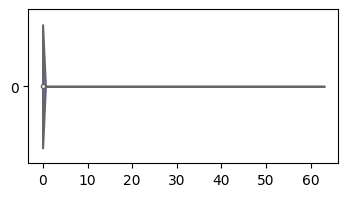

In [91]:
dist('pub_rec')


In [92]:
df2['pub_rec_woe'] = pd.cut(df2['pub_rec'],10)
woe(df2,'pub_rec_woe')

pub_rec_woe  num_observation  good_loan_prob  weight_of_evidence  \
0   (31.5, 37.8]                1        1.000000          -20.434881   
1   (37.8, 44.1]                1        1.000000          -20.434881   
2   (44.1, 50.4]                1        1.000000          -20.434881   
3   (50.4, 56.7]                1        1.000000          -20.434881   
4   (56.7, 63.0]                1        1.000000          -20.434881   
5   (18.9, 25.2]                2        1.000000          -19.741731   
6   (12.6, 18.9]                8        1.000000          -18.355424   
7    (6.3, 12.6]              130        0.930769          -15.567070   
8  (-0.063, 6.3]           466140        0.883801            0.693177   
9   (25.2, 31.5]                0             NaN                 NaN   

   information_value  
0           8.320056  
1           8.320056  
2           8.320056  
3           8.320056  
4           8.320056  
5           8.320056  
6           8.320056  
7           8.320056  
8           8.320056  
9           8.320056

high information value, drop the feature

### feature `revol_util`

number of unique values : 1269
Distribution :
count    466285.000000
mean         56.177985
std          23.724005
min           0.000000
25%          39.200000
50%          57.600000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64


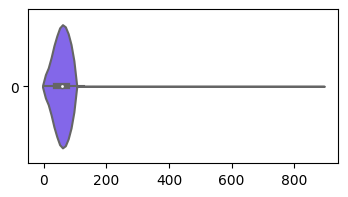

In [93]:
dist('revol_util')


In [94]:
df2['revol_util_woe'] = pd.cut(df2['revol_util'],10)
woe(df2,'revol_util_woe')

revol_util_woe  num_observation  good_loan_prob  weight_of_evidence  \
0  (178.46, 267.69]                1        1.000000          -14.823566   
1  (356.92, 446.15]                1        1.000000          -14.823566   
2   (803.07, 892.3]                1        1.000000          -14.823566   
3   (89.23, 178.46]            36805        0.851678           -4.227957   
4   (-0.892, 89.23]           429477        0.886571            0.685837   
5  (267.69, 356.92]                0             NaN                 NaN   
6  (446.15, 535.38]                0             NaN                 NaN   
7  (535.38, 624.61]                0             NaN                 NaN   
8  (624.61, 713.84]                0             NaN                 NaN   
9  (713.84, 803.07]                0             NaN                 NaN   

   information_value  
0           2.421559  
1           2.421559  
2           2.421559  
3           2.421559  
4           2.421559  
5           2.421559  
6           2.421559  
7           2.421559  
8           2.421559  
9           2.421559

### feature `total_acc`

number of unique values : 112
Distribution :
count    466285.000000
mean         25.064302
std          11.599792
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64


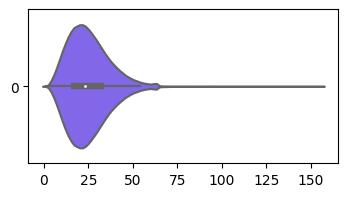

In [95]:
dist('total_acc')


In [98]:
df2['total_acce_woe'] = pd.cut(df2['total_acc'],10)
woe(df2,'total_acc_woe')

KeyError: ignored

### feature `out_prncp`

number of unique values : 135665
Distribution :
count    466285.000000
mean       4410.062342
std        6355.078769
min           0.000000
25%           0.000000
50%         441.470000
75%        7341.650000
max       32160.380000
Name: out_prncp, dtype: float64


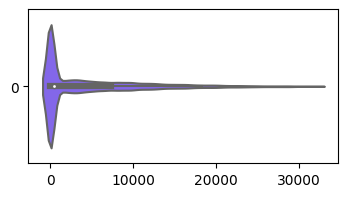

In [99]:
dist('out_prncp')


In [100]:
df2['out_prncp_woe'] = pd.cut(df2['out_prncp'],10)
woe(df2,'out_prncp_woe')

out_prncp_woe  num_observation  good_loan_prob  \
0   (28944.342, 32160.38]             1069        0.882133   
1  (25728.304, 28944.342]             3501        0.948872   
2  (22512.266, 25728.304]             5698        0.949456   
3  (19296.228, 22512.266]             9548        0.950670   
4   (16080.19, 19296.228]            14389        0.954618   
5   (12864.152, 16080.19]            20961        0.957206   
6   (9648.114, 12864.152]            32345        0.957397   
7    (6432.076, 9648.114]            40780        0.962359   
8    (3216.038, 6432.076]            53837        0.963482   
9      (-32.16, 3216.038]           284157        0.835721   

   weight_of_evidence  information_value  
0           -5.673524           1.693731  
1           -4.481957           1.693731  
2           -3.990132           1.693731  
3           -3.465522           1.693731  
4           -3.044734           1.693731  
5           -2.653884           1.693731  
6           -2.194192           1.693731  
7           -1.942830           1.693731  
8           -1.633895           1.693731  
9            0.847072           1.693731

high information value, drop the feature

### feature `total_pymnt`

number of unique values : 351609
Distribution :
count    466285.000000
mean      11540.686220
std        8265.627112
min           0.000000
25%        5552.125349
50%        9419.250943
75%       15308.158460
max       57777.579870
Name: total_pymnt, dtype: float64


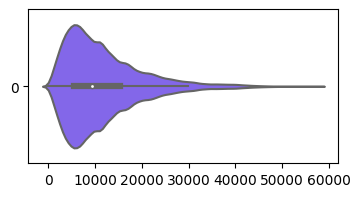

In [101]:
dist('total_pymnt')


In [102]:
df2['total_pymnt_woe'] = pd.cut(df2['total_pymnt'],10)
woe(df2,'total_pymnt_woe')

total_pymnt_woe  num_observation  good_loan_prob  \
0   (51999.822, 57777.58]               84        1.000000   
1  (46222.064, 51999.822]              654        0.996942   
2  (40444.306, 46222.064]             3176        0.990554   
3  (34666.548, 40444.306]             6668        0.983353   
4   (28888.79, 34666.548]            11215        0.973963   
5   (23111.032, 28888.79]            23277        0.965288   
6  (17333.274, 23111.032]            45849        0.952845   
7  (11555.516, 17333.274]            90733        0.932439   
8     (-57.778, 5777.758]           124655        0.775420   
9   (5777.758, 11555.516]           159974        0.895958   

   weight_of_evidence  information_value  
0           -7.469040           0.462987  
1           -5.415527           0.462987  
2           -3.829825           0.462987  
3           -3.080559           0.462987  
4           -2.550684           0.462987  
5           -1.793607           0.462987  
6           -1.063424           0.462987  
7           -0.267961           0.462987  
8            0.144337           0.462987  
9            0.502925           0.462987

### feature `total_rec_int`

number of unique values : 270249
Distribution :
count    466285.000000
mean       2588.677225
std        2483.809661
min           0.000000
25%         957.280000
50%        1818.880000
75%        3304.530000
max       24205.620000
Name: total_rec_int, dtype: float64


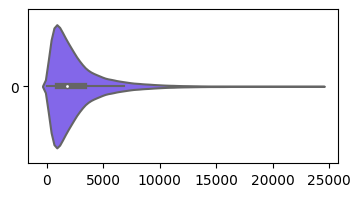

In [103]:
dist('total_rec_int')


In [104]:
df2['total_rec_int_woe'] = pd.cut(df2['total_rec_int'],10)
woe(df2,'total_rec_int_woe')

total_rec_int_woe  num_observation  good_loan_prob  \
0   (21785.058, 24205.62]               32        0.937500   
1  (19364.496, 21785.058]              173        0.901734   
2  (16943.934, 19364.496]              546        0.906593   
3  (14523.372, 16943.934]             1341        0.912006   
4   (12102.81, 14523.372]             2584        0.894737   
5    (9682.248, 12102.81]             6371        0.901585   
6    (7261.686, 9682.248]            15594        0.894703   
7    (4841.124, 7261.686]            37363        0.891658   
8    (2420.562, 4841.124]           110226        0.892494   
9     (-24.206, 2420.562]           292055        0.878287   

   weight_of_evidence  information_value  
0           -9.410109           1.163761  
1           -7.722251           1.163761  
2           -6.572123           1.163761  
3           -5.671862           1.163761  
4           -5.013262           1.163761  
5           -4.102644           1.163761  
6           -3.187257           1.163761  
7           -2.263955           1.163761  
8           -0.995925           1.163761  
9            0.693205           1.163761

high information value, drop the feature

### feature `total_rec_late_fee`

number of unique values : 5808
Distribution :
count    466285.000000
mean          0.650129
std           5.265730
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64


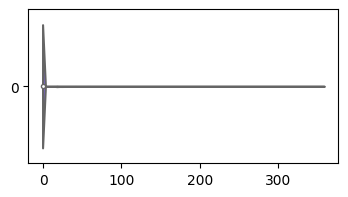

In [105]:
dist('total_rec_late_fee')


In [106]:
df2['total_rec_late_fee_woe'] = pd.cut(df2['total_rec_late_fee'],10)
woe(df2,'total_rec_late_fee_woe')

total_rec_late_fee_woe  num_observation  good_loan_prob  weight_of_evidence  \
0     (286.944, 322.812]                1        0.000000          -17.664310   
1      (322.812, 358.68]                1        0.000000          -17.664310   
2     (215.208, 251.076]                2        0.500000          -16.971161   
3     (251.076, 286.944]                3        0.666667          -16.565693   
4      (179.34, 215.208]                8        0.375000          -15.584853   
5      (143.472, 179.34]               19        0.421053          -14.719832   
6     (107.604, 143.472]               85        0.435294          -13.221479   
7      (71.736, 107.604]              279        0.433692          -12.032502   
8       (35.868, 71.736]             1905        0.447244          -10.107981   
9       (-0.359, 35.868]           463982        0.885998            0.693873   

   information_value  
0           5.618606  
1           5.618606  
2           5.618606  
3           5.618606  
4           5.618606  
5           5.618606  
6           5.618606  
7           5.618606  
8           5.618606  
9           5.618606

high information value, drop the feature

### feature `recoveries`

number of unique values : 22773
Distribution :
count    466285.000000
mean         85.344211
std         552.216084
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64


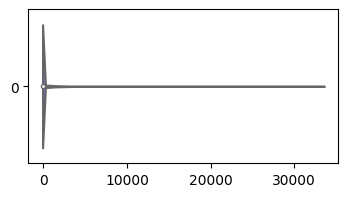

In [107]:
dist('recoveries')


In [108]:
df2['recoveries_woe'] = pd.cut(df2['recoveries'],10)
woe(df2,'recoveries_woe')

recoveries_woe  num_observation  good_loan_prob  \
0   (30168.243, 33520.27]                2        0.000000   
1  (23464.189, 26816.216]                3        0.000000   
2  (26816.216, 30168.243]                3        0.000000   
3  (20112.162, 23464.189]               10        0.000000   
4  (16760.135, 20112.162]               13        0.000000   
5  (13408.108, 16760.135]               32        0.000000   
6  (10056.081, 13408.108]               74        0.000000   
7   (6704.054, 10056.081]              241        0.000000   
8    (3352.027, 6704.054]             2664        0.000000   
9      (-33.52, 3352.027]           463243        0.889622   

   weight_of_evidence  information_value  
0          -16.691282           5.288953  
1          -16.285814           5.288953  
2          -16.285814           5.288953  
3          -15.081827           5.288953  
4          -14.819456           5.288953  
5          -13.918629           5.288953  
6          -13.080209           5.288953  
7          -11.899119           5.288953  
8           -9.491119           5.288953  
9            0.693856           5.288953

high information value, drop the column

### feature `last_pymnt_amnt`

number of unique values : 198194
Distribution :
count    466285.000000
mean       3123.913796
std        5554.737393
min           0.000000
25%         312.620000
50%         545.960000
75%        3187.510000
max       36234.440000
Name: last_pymnt_amnt, dtype: float64


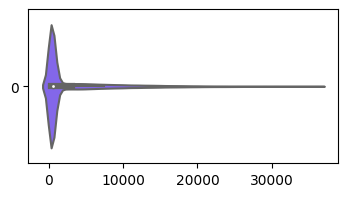

In [109]:
dist('last_pymnt_amnt')


In [110]:
df2['last_pymnt_amnt_woe'] = pd.cut(df2['last_pymnt_amnt'],10)
woe(df2,'last_pymnt_amnt_woe')

last_pymnt_amnt_woe  num_observation  good_loan_prob  \
0   (32610.996, 36234.44]              843        0.997628   
1  (28987.552, 32610.996]             1620        0.999383   
2  (25364.108, 28987.552]             2506        1.000000   
3  (21740.664, 25364.108]             4325        0.997225   
4   (18117.22, 21740.664]             7011        0.997005   
5   (14493.776, 18117.22]            11563        0.997578   
6  (10870.332, 14493.776]            17950        0.996769   
7   (7246.888, 10870.332]            26697        0.995730   
8    (3623.444, 7246.888]            38865        0.993027   
9     (-36.234, 3623.444]           354905        0.848785   

   weight_of_evidence  information_value  
0           -6.686025           2.289997  
1           -6.031140           2.289997  
2           -5.592969           2.289997  
3           -5.043315           2.289997  
4           -4.554416           2.289997  
5           -4.044125           2.289997  
6           -3.590200           2.289997  
7           -3.173536           2.289997  
8           -2.769922           2.289997  
9            0.786653           2.289997

In [111]:
# group the column

df2['last_pymnt_amnt_fc'] = np.where((df2['last_pymnt_amnt']>=0)&(df2['last_pymnt_amnt']<=500),0,
                               np.where((df2['last_pymnt_amnt']>500)&(df2['last_pymnt_amnt']<=1000),1,
                               np.where((df2['last_pymnt_amnt']>1000)&(df2['last_pymnt_amnt']<=1500),2,
                                        np.where((df2['last_pymnt_amnt']>1500)&(df2['last_pymnt_amnt']<=3500),3,4))))
woe(df2,'last_pymnt_amnt_fc')

last_pymnt_amnt_fc  num_observation  good_loan_prob  weight_of_evidence  \
0                   2            14979        0.871821           -2.659133   
1                   3            23745        0.974395           -2.178796   
2                   1            98694        0.843476           -0.568584   
3                   4           112856        0.995383           -0.395207   
4                   0           216011        0.834837            0.599136   

   information_value  
0           0.526734  
1           0.526734  
2           0.526734  
3           0.526734  
4           0.526734

### feature `collections_12_mths_ex_med`

number of unique values : 9
Distribution :
count    466285.000000
mean          0.009082
std           0.108632
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64


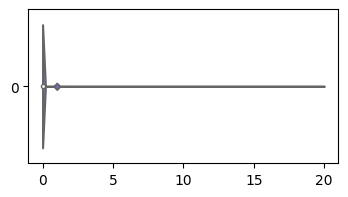

In [112]:
dist('collections_12_mths_ex_med')


In [113]:
df2['collections_12_mths_ex_med_woe'] = pd.cut(df2['collections_12_mths_ex_med'],10)
woe(df2,'collections_12_mths_ex_med_woe')

collections_12_mths_ex_med_woe  num_observation  good_loan_prob  \
0                   (14.0, 16.0]                1        1.000000   
1                   (18.0, 20.0]                1        1.000000   
2                     (4.0, 6.0]                2        1.000000   
3                     (2.0, 4.0]               26        0.884615   
4                   (-0.02, 2.0]           466255        0.883817   
5                     (6.0, 8.0]                0             NaN   
6                    (8.0, 10.0]                0             NaN   
7                   (10.0, 12.0]                0             NaN   
8                   (12.0, 14.0]                0             NaN   
9                   (16.0, 18.0]                0             NaN   

   weight_of_evidence  information_value  
0          -22.010686           9.917036  
1          -22.010686           9.917036  
2          -21.317536           9.917036  
3          -18.752536           9.917036  
4            0.693155           9.917036  
5                 NaN           9.917036  
6                 NaN           9.917036  
7                 NaN           9.917036  
8                 NaN           9.917036  
9                 NaN           9.917036

high information value, drop the column

### feature `acc_now_delinq`

number of unique values : 6
Distribution :
count    466285.000000
mean          0.004002
std           0.068635
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64


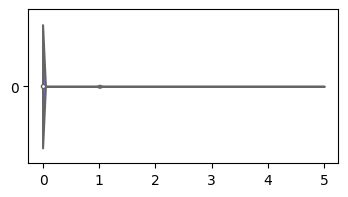

In [114]:
dist('acc_now_delinq')


In [115]:
df2['acc_now_delinq_woe'] = pd.cut(df2['acc_now_delinq'],10)
woe(df2,'acc_now_delinq_woe')

acc_now_delinq_woe  num_observation  good_loan_prob  weight_of_evidence  \
0         (4.5, 5.0]                2        0.500000          -17.257843   
1         (3.5, 4.0]                4        1.000000          -16.564691   
2         (2.5, 3.0]               11        0.818182          -15.553075   
3         (1.5, 2.0]               92        0.902174          -13.429008   
4         (0.5, 1.0]             1623        0.887246          -10.555476   
5      (-0.005, 0.5]           464553        0.883804            0.693357   
6         (1.0, 1.5]                0             NaN                 NaN   
7         (2.0, 2.5]                0             NaN                 NaN   
8         (3.0, 3.5]                0             NaN                 NaN   
9         (4.0, 4.5]                0             NaN                 NaN   

   information_value  
0           5.728868  
1           5.728868  
2           5.728868  
3           5.728868  
4           5.728868  
5           5.728868  
6           5.728868  
7           5.728868  
8           5.728868  
9           5.728868

high information value, drop the column

### feature `tot_coll_amt`

number of unique values : 6321
Distribution :
count    4.662850e+05
mean     1.629893e+02
std      1.348289e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64


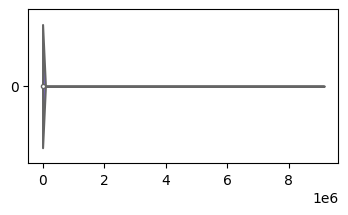

In [116]:
dist('tot_coll_amt')


In [117]:
df2['tot_coll_amt_woe'] = pd.cut(df2['tot_coll_amt'],10)
woe(df2,'tot_coll_amt_woe')

tot_coll_amt_woe  num_observation  good_loan_prob  \
0  (8237290.5, 9152545.0]                1        1.000000   
1   (-9152.545, 915254.5]           466284        0.883818   
2   (915254.5, 1830509.0]                0             NaN   
3  (1830509.0, 2745763.5]                0             NaN   
4  (2745763.5, 3661018.0]                0             NaN   
5  (3661018.0, 4576272.5]                0             NaN   
6  (4576272.5, 5491527.0]                0             NaN   
7  (5491527.0, 6406781.5]                0             NaN   
8  (6406781.5, 7322036.0]                0             NaN   
9  (7322036.0, 8237290.5]                0             NaN   

   weight_of_evidence  information_value  
0          -25.411953           13.05255  
1            0.693147           13.05255  
2                 NaN           13.05255  
3                 NaN           13.05255  
4                 NaN           13.05255  
5                 NaN           13.05255  
6                 NaN           13.05255  
7                 NaN           13.05255  
8                 NaN           13.05255  
9                 NaN           13.05255

high information value, drop the column

### feature `tot_cur_bal`

number of unique values : 220690
Distribution :
count    4.662850e+05
mean     1.301714e+05
std      1.416729e+05
min      0.000000e+00
25%      3.361100e+04
50%      8.153900e+04
75%      1.849300e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64


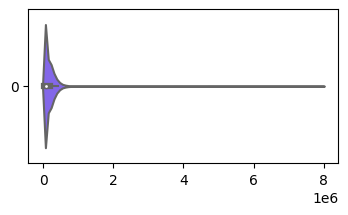

In [118]:
dist('tot_cur_bal')


In [119]:
df2['tot_cur_bal_woe'] = pd.cut(df2['tot_cur_bal'],10)
woe(df2,'tot_cur_bal_woe')

tot_cur_bal_woe  num_observation  good_loan_prob  \
0  (7200070.2, 8000078.0]                1        1.000000   
1  (4000039.0, 4800046.8]                2        1.000000   
2  (3200031.2, 4000039.0]                9        0.888889   
3  (2400023.4, 3200031.2]               15        1.000000   
4  (1600015.6, 2400023.4]               93        0.924731   
5   (800007.8, 1600015.6]             1581        0.945604   
6   (-8000.078, 800007.8]           464584        0.883595   
7  (4800046.8, 5600054.6]                0             NaN   
8  (5600054.6, 6400062.4]                0             NaN   
9  (6400062.4, 7200070.2]                0             NaN   

   weight_of_evidence  information_value  
0          -17.969097           5.766128  
1          -17.275948           5.766128  
2          -15.771855           5.766128  
3          -15.261017           5.766128  
4          -13.436300           5.766128  
5          -10.599890           5.766128  
6            0.693379           5.766128  
7                 NaN           5.766128  
8                 NaN           5.766128  
9                 NaN           5.766128

high information value, drop the column

### feature `total_rev_hi_lim`

number of unique values : 14612
Distribution :
count    4.662850e+05
mean     2.923681e+04
std      3.443264e+04
min      0.000000e+00
25%      1.500000e+04
50%      2.280000e+04
75%      3.430000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64


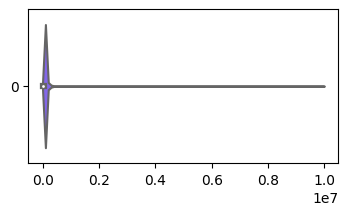

In [120]:
dist('total_rev_hi_lim')


In [121]:
df2['total_rev_hi_lim_woe'] = pd.cut(df2['total_rev_hi_lim'],10)
woe(df2,'total_rev_hi_lim_woe')

total_rev_hi_lim_woe  num_observation  good_loan_prob  \
0  (1999999.8, 2999999.7]                1        1.000000   
1  (8999999.1, 9999999.0]                2        1.000000   
2   (999999.9, 1999999.8]                8        0.875000   
3   (-9999.999, 999999.9]           466274        0.883817   
4  (2999999.7, 3999999.6]                0             NaN   
5  (3999999.6, 4999999.5]                0             NaN   
6  (4999999.5, 5999999.4]                0             NaN   
7  (5999999.4, 6999999.3]                0             NaN   
8  (6999999.3, 7999999.2]                0             NaN   
9  (7999999.2, 8999999.1]                0             NaN   

   weight_of_evidence  information_value  
0          -23.014031           11.03447  
1          -22.320882           11.03447  
2          -20.934575           11.03447  
3            0.693152           11.03447  
4                 NaN           11.03447  
5                 NaN           11.03447  
6                 NaN           11.03447  
7                 NaN           11.03447  
8                 NaN           11.03447  
9                 NaN           11.03447

high information value, drop the column

### feature `pymnt_time`

number of unique values : 98
Distribution :
count    466285.000000
mean          8.911018
std          12.253806
min           0.000000
25%           1.000000
50%           2.000000
75%          13.000000
max          97.000000
Name: pymnt_time, dtype: float64


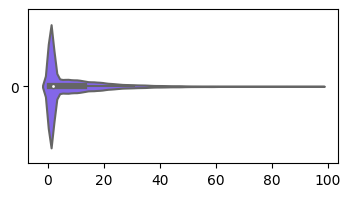

In [122]:
dist('pymnt_time')


In [123]:
df2['pymnt_time_woe'] = pd.cut(df2['pymnt_time'],10)
woe(df2,'pymnt_time_woe')

pymnt_time_woe  num_observation  good_loan_prob  weight_of_evidence  \
0   (87.3, 97.0]              113        0.672566           -8.313535   
1   (77.6, 87.3]              332        0.605422           -7.235318   
2   (67.9, 77.6]              920        0.670652           -6.214817   
3   (58.2, 67.9]             2270        0.792511           -5.308750   
4   (48.5, 58.2]             4451        0.774433           -4.630690   
5   (38.8, 48.5]             9647        0.777962           -3.845857   
6   (29.1, 38.8]            17057        0.772938           -3.259583   
7   (19.4, 29.1]            37453        0.770406           -2.426591   
8    (9.7, 19.4]            77345        0.785196           -1.603762   
9  (-0.097, 9.7]           316697        0.933691            0.761448   

   information_value  
0           1.601062  
1           1.601062  
2           1.601062  
3           1.601062  
4           1.601062  
5           1.601062  
6           1.601062  
7           1.601062  
8           1.601062  
9           1.601062

In [124]:
# this column will be grouped
df2['pymnt_time_fc'] = np.where((df2['pymnt_time']>=0)&(df2['pymnt_time']<=1),0,
                               np.where((df2['pymnt_time']>1)&(df2['pymnt_time']<=6),1,
                               np.where((df2['pymnt_time']>6)&(df2['pymnt_time']<=12),2,3)))

woe(df2,'pymnt_time_fc')

pymnt_time_fc  num_observation  good_loan_prob  weight_of_evidence  \
0              2            60123        0.792309           -1.037811   
1              1            91812        0.884928           -0.533228   
2              3           120931        0.772837           -0.176801   
3              0           193419        0.981124            0.528427   

   information_value  
0           0.290574  
1           0.290574  
2           0.290574  
3           0.290574

### feature `credit_duration_year`

number of unique values : 47
Distribution :
count    466285.000000
mean         18.267693
std           7.279543
min           1.000000
25%          13.000000
50%          17.000000
75%          22.000000
max          47.000000
Name: credit_duration_year, dtype: float64


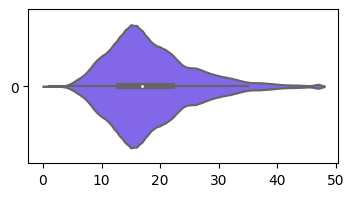

In [125]:
dist('credit_duration_year')


In [126]:
df2['credit_duration_year_woe'] = pd.cut(df2['credit_duration_year'],10)
woe(df2,'credit_duration_year_woe')

credit_duration_year_woe  num_observation  good_loan_prob  \
0             (0.954, 5.6]             2447        0.727013   
1             (42.4, 47.0]             3500        0.899429   
2             (37.8, 42.4]             6021        0.911975   
3             (33.2, 37.8]             9018        0.913617   
4             (28.6, 33.2]            25962        0.908289   
5             (24.0, 28.6]            37210        0.903655   
6              (5.6, 10.2]            50809        0.846149   
7             (19.4, 24.0]            84754        0.899828   
8             (10.2, 14.8]            99408        0.870866   
9             (14.8, 19.4]           147156        0.886277   

   weight_of_evidence  information_value  
0           -3.858715           0.480007  
1           -3.498542           0.480007  
2           -2.950589           0.480007  
3           -2.540087           0.480007  
4           -1.444917           0.480007  
5           -1.059097           0.480007  
6           -0.715394           0.480007  
7           -0.118482           0.480007  
8            0.080164           0.480007  
9            0.611855           0.480007

In [127]:
df2[nums].head()

loan_amnt  int_rate  annual_inc  loan_status    dti  delinq_2yrs  \
0   (3950.0, 7400.0]     10.65     24000.0            1  27.65          0.0   
1    (465.5, 3950.0]     15.27     30000.0            0   1.00          0.0   
2    (465.5, 3950.0]     15.96     12252.0            1   8.72          0.0   
3  (7400.0, 10850.0]     13.49     49200.0            1  20.00          0.0   
4    (465.5, 3950.0]     12.69     80000.0            1  17.94          0.0   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  out_prncp  \
0             1.0       3.0      0.0        83.7        9.0        0.0   
1             5.0       3.0      0.0         9.4        4.0        0.0   
2             2.0       2.0      0.0        98.5       10.0        0.0   
3             1.0      10.0      0.0        21.0       37.0        0.0   
4             0.0      15.0      0.0        53.9       38.0      766.9   

    total_pymnt  total_rec_int  total_rec_late_fee  recoveries  \
0   5861.071414         861.07                0.00        0.00   
1   1008.710000         435.17                0.00      117.08   
2   3003.653644         603.65                0.00        0.00   
3  12226.302210        2209.33               16.97        0.00   
4   3242.170000        1009.07                0.00        0.00   

   last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  \
0           171.62                         0.0             0.0           0.0   
1           119.66                         0.0             0.0           0.0   
2           649.91                         0.0             0.0           0.0   
3           357.48                         0.0             0.0           0.0   
4            67.79                         0.0             0.0           0.0   

   tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_duration_year  
0      81539.0           22800.0          13                    31  
1      81539.0           22800.0          34                    14  
2      81539.0           22800.0          20                    15  
3      81539.0           22800.0          13                    19  
4      81539.0           22800.0           1                    20

### Conclusion woe and iv

In [78]:
# list of feature to be deleted
del_list  = ['verification_status',
             'annual_inc',
             'delinq_2yrs',
             'inq_last_6mths',
             'pub_rec',
             'out_prncp',
             'total_rec_int',
             'total_rec_late_fee',
             'recoveries',
             'collections_12_mths_ex_med',
             'acc_now_delinq',
             'tot_coll_amt',
             'tot_cur_bal',
             'total_rev_hi_lim']

In [79]:
df3 = df1.copy()

In [130]:
df3 = df3.drop(columns = del_list)

In [131]:
df3.head()

loan_amnt  term  int_rate grade emp_length home_ownership  loan_status  \
0       5000    36     10.65     B  10+ years           RENT            1   
1       2500    60     15.27     C   < 1 year           RENT            0   
2       2400    36     15.96     C  10+ years           RENT            1   
3      10000    36     13.49     C  10+ years           RENT            1   
4       3000    60     12.69     B     1 year           RENT            1   

          purpose    dti  open_acc  revol_util  total_acc initial_list_status  \
0     credit_card  27.65       3.0        83.7        9.0                   f   
1             car   1.00       3.0         9.4        4.0                   f   
2  small_business   8.72       2.0        98.5       10.0                   f   
3           other  20.00      10.0        21.0       37.0                   f   
4           other  17.94      15.0        53.9       38.0                   f   

    total_pymnt  last_pymnt_amnt  pymnt_time  credit_duration_year  
0   5861.071414           171.62          13                    31  
1   1008.710000           119.66          34                    14  
2   3003.653644           649.91          20                    15  
3  12226.302210           357.48          13                    19  
4   3242.170000            67.79           1                    20

In [132]:
print("Shape of data :", df3.shape)
print("Number of rows :", df3.shape[0])
print("Number of columns :", df3.shape[1])

Shape of data : (466285, 17)
Number of rows : 466285
Number of columns : 17


there is 17 column available now

## Feature Encoding

In [133]:
df4 = df3.copy()
df4.head()

loan_amnt  term  int_rate grade emp_length home_ownership  loan_status  \
0       5000    36     10.65     B  10+ years           RENT            1   
1       2500    60     15.27     C   < 1 year           RENT            0   
2       2400    36     15.96     C  10+ years           RENT            1   
3      10000    36     13.49     C  10+ years           RENT            1   
4       3000    60     12.69     B     1 year           RENT            1   

          purpose    dti  open_acc  revol_util  total_acc initial_list_status  \
0     credit_card  27.65       3.0        83.7        9.0                   f   
1             car   1.00       3.0         9.4        4.0                   f   
2  small_business   8.72       2.0        98.5       10.0                   f   
3           other  20.00      10.0        21.0       37.0                   f   
4           other  17.94      15.0        53.9       38.0                   f   

    total_pymnt  last_pymnt_amnt  pymnt_time  credit_duration_year  
0   5861.071414           171.62          13                    31  
1   1008.710000           119.66          34                    14  
2   3003.653644           649.91          20                    15  
3  12226.302210           357.48          13                    19  
4   3242.170000            67.79           1                    20

In [134]:
df4.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'loan_status', 'purpose', 'dti', 'open_acc',
       'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt',
       'last_pymnt_amnt', 'pymnt_time', 'credit_duration_year'],
      dtype='object')

In [135]:
nums = ['loan_amnt', 'int_rate', 'loan_status',
        'dti', 'open_acc', 'revol_util', 'total_acc',
        'total_pymnt','last_pymnt_amnt', 'pymnt_time',
        'credit_duration_year']
cats = ['term', 'grade', 'emp_length', 'initial_list_status',
       'home_ownership', 'purpose']
#target , 'loan_status'

In [136]:
for cat in cats:
  print(df4[cat].unique())

[36 60]
['B' 'C' 'A' 'E' 'F' 'D' 'G']
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']
['f' 'w']
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


In [137]:
cats_one_hot = ['term',  'initial_list_status', 'home_ownership', 'purpose']

cats_label_encode = ['grade', 'emp_length']

#### Label encoding

In [138]:
for cat in cats_label_encode:
  print(f'\ncolumn {cat} :')
  print(df4[cat].unique())
  print(df4[cat].value_counts())


column grade :
['B' 'C' 'A' 'E' 'F' 'D' 'G']
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

column emp_length :
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']
10+ years    171057
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64


In [139]:
# Grade
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df4['grade'] = label_encoder.fit_transform(df4['grade'])


In [140]:
# emp_length
emp_length_mapping = {
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
}

df4['emp_length'] = df4['emp_length'].map(emp_length_mapping)

In [141]:
df4.head()

loan_amnt  term  int_rate  grade  emp_length home_ownership  loan_status  \
0       5000    36     10.65      1          10           RENT            1   
1       2500    60     15.27      2           0           RENT            0   
2       2400    36     15.96      2          10           RENT            1   
3      10000    36     13.49      2          10           RENT            1   
4       3000    60     12.69      1           1           RENT            1   

          purpose    dti  open_acc  revol_util  total_acc initial_list_status  \
0     credit_card  27.65       3.0        83.7        9.0                   f   
1             car   1.00       3.0         9.4        4.0                   f   
2  small_business   8.72       2.0        98.5       10.0                   f   
3           other  20.00      10.0        21.0       37.0                   f   
4           other  17.94      15.0        53.9       38.0                   f   

    total_pymnt  last_pymnt_amnt  pymnt_time  credit_duration_year  
0   5861.071414           171.62          13                    31  
1   1008.710000           119.66          34                    14  
2   3003.653644           649.91          20                    15  
3  12226.302210           357.48          13                    19  
4   3242.170000            67.79           1                    20

#### One hot encoding

In [142]:
for cat in cats_one_hot:
  print(f'\ncolumn {cat} :')
  print(df4[cat].unique())
  print(df4[cat].value_counts())


column term :
[36 60]
36    337953
60    128332
Name: term, dtype: int64

column initial_list_status :
['f' 'w']
f    303005
w    163280
Name: initial_list_status, dtype: int64

column home_ownership :
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

column purpose :
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy   

In [143]:
df4['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

In [231]:
print('test')

test


In [144]:
targetdict = {'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER',
               'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',}

df4["home_ownership"] = df4["home_ownership"].map(targetdict)
df4['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          233
Name: home_ownership, dtype: int64

In [145]:
for cat in cats_one_hot:
  print(f'\ncolumn {cat} :')
  print(df4[cat].unique())
  print(df4[cat].value_counts())


column term :
[36 60]
36    337953
60    128332
Name: term, dtype: int64

column initial_list_status :
['f' 'w']
f    303005
w    163280
Name: initial_list_status, dtype: int64

column home_ownership :
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          233
Name: home_ownership, dtype: int64

column purpose :
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64


In [146]:
df4 = pd.get_dummies(df4, columns=cats_one_hot, prefix=['term', 'initial_status', 'ownership', 'purpose' ])
df4.head()

loan_amnt  int_rate  grade  emp_length  loan_status    dti  open_acc  \
0       5000     10.65      1          10            1  27.65       3.0   
1       2500     15.27      2           0            0   1.00       3.0   
2       2400     15.96      2          10            1   8.72       2.0   
3      10000     13.49      2          10            1  20.00      10.0   
4       3000     12.69      1           1            1  17.94      15.0   

   revol_util  total_acc   total_pymnt  last_pymnt_amnt  pymnt_time  \
0        83.7        9.0   5861.071414           171.62          13   
1         9.4        4.0   1008.710000           119.66          34   
2        98.5       10.0   3003.653644           649.91          20   
3        21.0       37.0  12226.302210           357.48          13   
4        53.9       38.0   3242.170000            67.79           1   

   credit_duration_year  term_36  term_60  initial_status_f  initial_status_w  \
0                    31        1        0                 1                 0   
1                    14        0        1                 1                 0   
2                    15        1        0                 1                 0   
3                    19        1        0                 1                 0   
4                    20        0        1                 1                 0   

   ownership_MORTGAGE  ownership_OTHER  ownership_OWN  ownership_RENT  \
0                   0                0              0               1   
1                   0                0              0               1   
2                   0                0              0               1   
3                   0                0              0               1   
4                   0                0              0               1   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0            0                    1                           0   
1            1                    0                           0   
2            0                    0                           0   
3            0                    0                           0   
4            0                    0                           0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                    0                         0              0   
1                    0                         0              0   
2                    0                         0              0   
3                    0                         0              0   
4                    0                         0              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              1   
4                       0                0               0              1   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0                 0   
1                         0                       0                 0   
2                         0                       1                 0   
3                         0                       0                 0   
4                         0                       0                 0   

   purpose_wedding  
0                0  
1                0  
2                0  
3                0  
4                0

In [147]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   int_rate                    466285 non-null  float64
 2   grade                       466285 non-null  int64  
 3   emp_length                  466285 non-null  int64  
 4   loan_status                 466285 non-null  int64  
 5   dti                         466285 non-null  float64
 6   open_acc                    466285 non-null  float64
 7   revol_util                  466285 non-null  float64
 8   total_acc                   466285 non-null  float64
 9   total_pymnt                 466285 non-null  float64
 10  last_pymnt_amnt             466285 non-null  float64
 11  pymnt_time                  466285 non-null  int64  
 12  credit_duration_year        466285 non-null  int64  
 13  term_36       

#### Numerical encoding

# Modeling

In [148]:
df_model = df4.copy()

In [149]:
x = df_model.drop(['loan_status'], axis=1)
y = df_model['loan_status']

In [150]:
y.value_counts()

1    412111
0     54174
Name: loan_status, dtype: int64

## Data Split

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=24)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((326399, 34), (139886, 34), (326399,), (139886,))

## Train Model

In [152]:
#model evaluation

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("\nPrecision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("\nRecall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("\nF1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

def roc_auc_eval(model):
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)

    print("\nroc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

### Decision tree

In [153]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [154]:
eval_classification(dt)
roc_auc_eval(dt)

Accuracy (Test Set): 0.98
Accuracy (Train set): 1.00

Precision (Test Set): 0.99
Precision (Train Set): 1.00

Recall (Test Set): 0.99
Recall (Train Set): 1.00

F1-Score (Test Set): 0.99
F1-Score (Train Set): 1.00

roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00


### Hyperparameter tunning

### Decision tree random search

In [167]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [169]:
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(x_train, y_train)
accuracy = best_tree.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9719342893498992


In [173]:
best_dt = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Decision Tree Model:")
print(best_dt)
print("\nBest Parameters:")
print(best_params)
print("\nBest Recall Score:")
print(best_score)

Best Decision Tree Model:
DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=10)

Best Parameters:
{'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Best Recall Score:
0.9675395500035966


### Retrain model

In [174]:
dt_model = best_dt.fit(x_train, y_train)

# Evaluasi model
eval_classification(dt_model)

Accuracy (Test Set): 0.97
Accuracy (Train set): 0.97

Precision (Test Set): 0.97
Precision (Train Set): 0.98

Recall (Test Set): 0.99
Recall (Train Set): 0.99

F1-Score (Test Set): 0.98
F1-Score (Train Set): 0.98


In [179]:
roc_auc_eval(dt_model)


roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.97


In [181]:
y_pred_proba = dt_model.predict_proba(x_test)[:, 1]

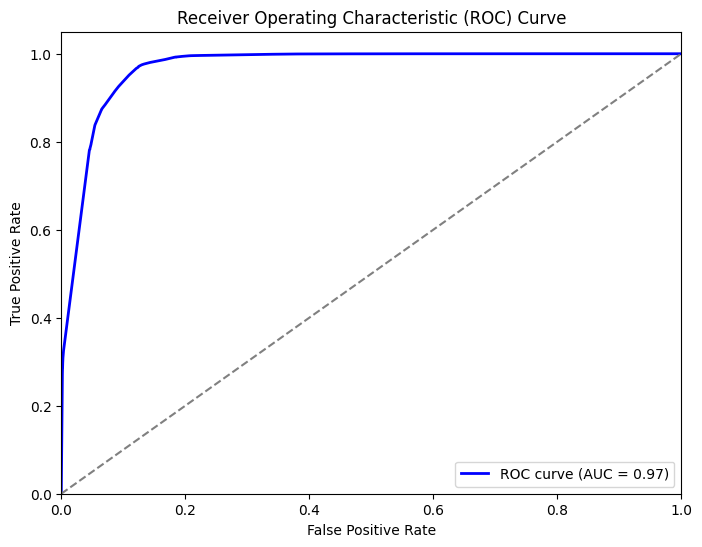

In [183]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

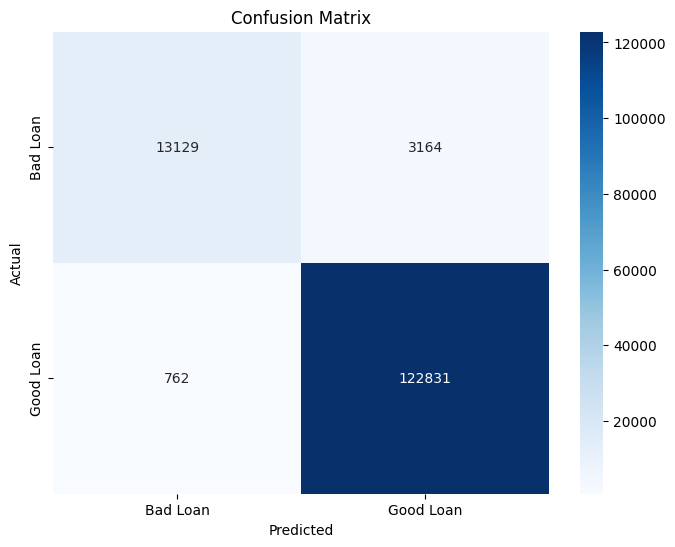

In [191]:
y_pred = dt_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
target_names = ['Bad Loan','Good Loan']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Cross Validation

In [193]:
scores = cross_val_score(dt_model, x_train, y_train, cv=5, scoring='roc_auc')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean score
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.96671877 0.96837874 0.967064   0.96815854 0.96736511]
Mean cross-validation score: 0.9675370296583965


### Feature Importance

Top 10 feature ranking:
1. Feature 'last_pymnt_amnt' (0.424852)
2. Feature 'loan_amnt' (0.180190)
3. Feature 'total_pymnt' (0.178699)
4. Feature 'pymnt_time' (0.127499)
5. Feature 'int_rate' (0.083249)
6. Feature 'initial_status_w' (0.001918)
7. Feature 'purpose_educational' (0.001409)
8. Feature 'ownership_OTHER' (0.000542)
9. Feature 'credit_duration_year' (0.000505)
10. Feature 'grade' (0.000504)


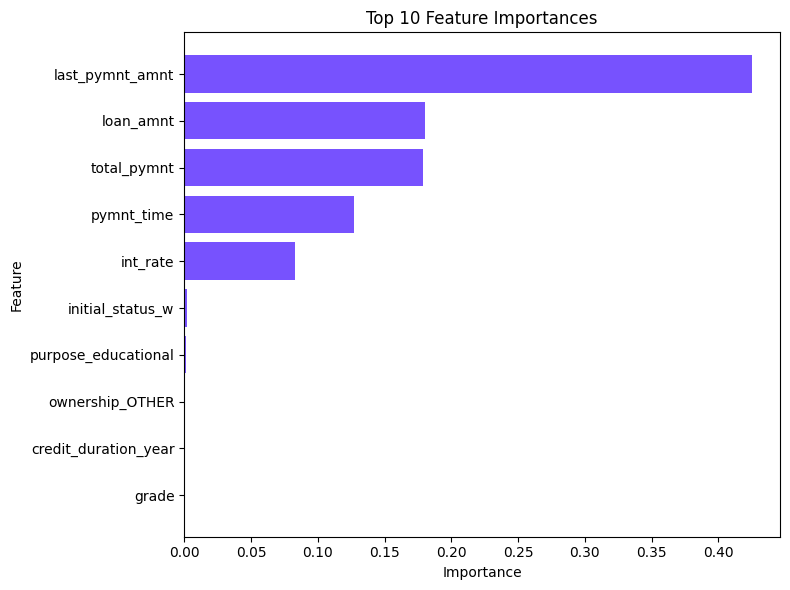

In [209]:
importances = dt_model.feature_importances_


indices = np.argsort(importances)[::-1]


feature_names = x_train.columns

# Select top 10 most important features
top_n = 10
top_indices = indices[:top_n]

# top 10 feature ranking
print("Top 10 feature ranking:")
for f in range(top_n):
    print("%d. Feature '%s' (%f)" % (f + 1, feature_names[top_indices[f]], importances[top_indices[f]]))


plt.figure(figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(top_n), importances[top_indices][::-1], align="center", color = '#7752FE')
plt.yticks(range(top_n), feature_names[top_indices][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Bussines Strategies

Based on feature importance :

1. **Last payment amount**
Increasing the payment amount taken from customers can reduce the chances of them becoming high-risk loans

2. **Loan amount**
The loan amount granted is linked to the associated interest rate to be paid. As the loan size increases, the corresponding interest rate also increases.

3. **Total Payment**
If payments fall within the range of 0 to 5000, it's probable that they would be deemed as problematic loans. This range often signals an increased likelihood of loan repayment issues or default.


4. **Payment Time**
The greater the duration customers have for repayment, the increased chance of them becoming high-risk loans.


5. **Interest Rate**
Higher interest rates taken by customers correlate with a rise in the rate of bad loans.  Consider to maintain low interest rate.